# <center>Hello Dream Games!</center>

### I want to begin with that I am truly appreciative of the opportunity where I can showcase my skills. I will discuss potential insights and draw inferences for each plot, concluding with an analysis of the current situation of the game at the end.

### **Flow of My Study:**

### **1. Acquisition**
- *Meeting with User:* Where and how do we meet the user?

### **2. Marketing**
- *User Encounter:* How did we meet the user?

### **3. Revenue**
- *Profitability:* Did we make money from this acquisition?

### **4. Engagement**
- *User Experience:* Is the user having a positive experience?

### **5. Churn**
- *User Retention:* Do we still have this user?

### **6. Current State of the Game and Future Work**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.dates as mdates


In [2]:
# set up connection to bigquery
connection = bigquery.Client.from_service_account_json('ilkeratav.json')

# <center> ACQUISITION 

In [3]:
query_users = """
SELECT network, country, platform, COUNT(DISTINCT user_id) AS user_count
FROM `casedreamgames.Analytics.dataset_install`
GROUP BY network, country, platform
"""

df_users = connection.query(query_users).to_dataframe()

In [48]:
fig = px.sunburst(df_users, path=[ 'country', 'network', 'platform'], values='user_count')

fig.update_layout(
    title='Where are our users coming from?',
    margin=dict(t=50, l=10, r=10, b=10),
    width=800,
    height=800
)

fig.show()

Mercury is the largest part of our user acquisition, with an even distribution among Wood, Organic, and Buzz networks. Uranus and Saturn are potential pledging countries, contributing a significant number of organic users despite near-zero advertising spend. Pluto and Venus have low organic acquisition; we should explore localized SEO marketing opportunities there. We should also conduct a deeper analysis of Sid and Jessie networks, which contribute minimally to our user acquisition yet we can observe that we dropped marketing expenses in Sid and Jessie in Cost per Instal graph. Also "ios" nearly makes x12 in sid network acquisition when compared to ios.

In [5]:
query_installs = """
SELECT user_id, DATE(event_time) AS date, country, platform, network, COUNT(*) AS download_count
FROM `casedreamgames.Analytics.dataset_install`
GROUP BY user_id, date, country, network, platform
"""

df_installs = connection.query(query_installs).to_dataframe()

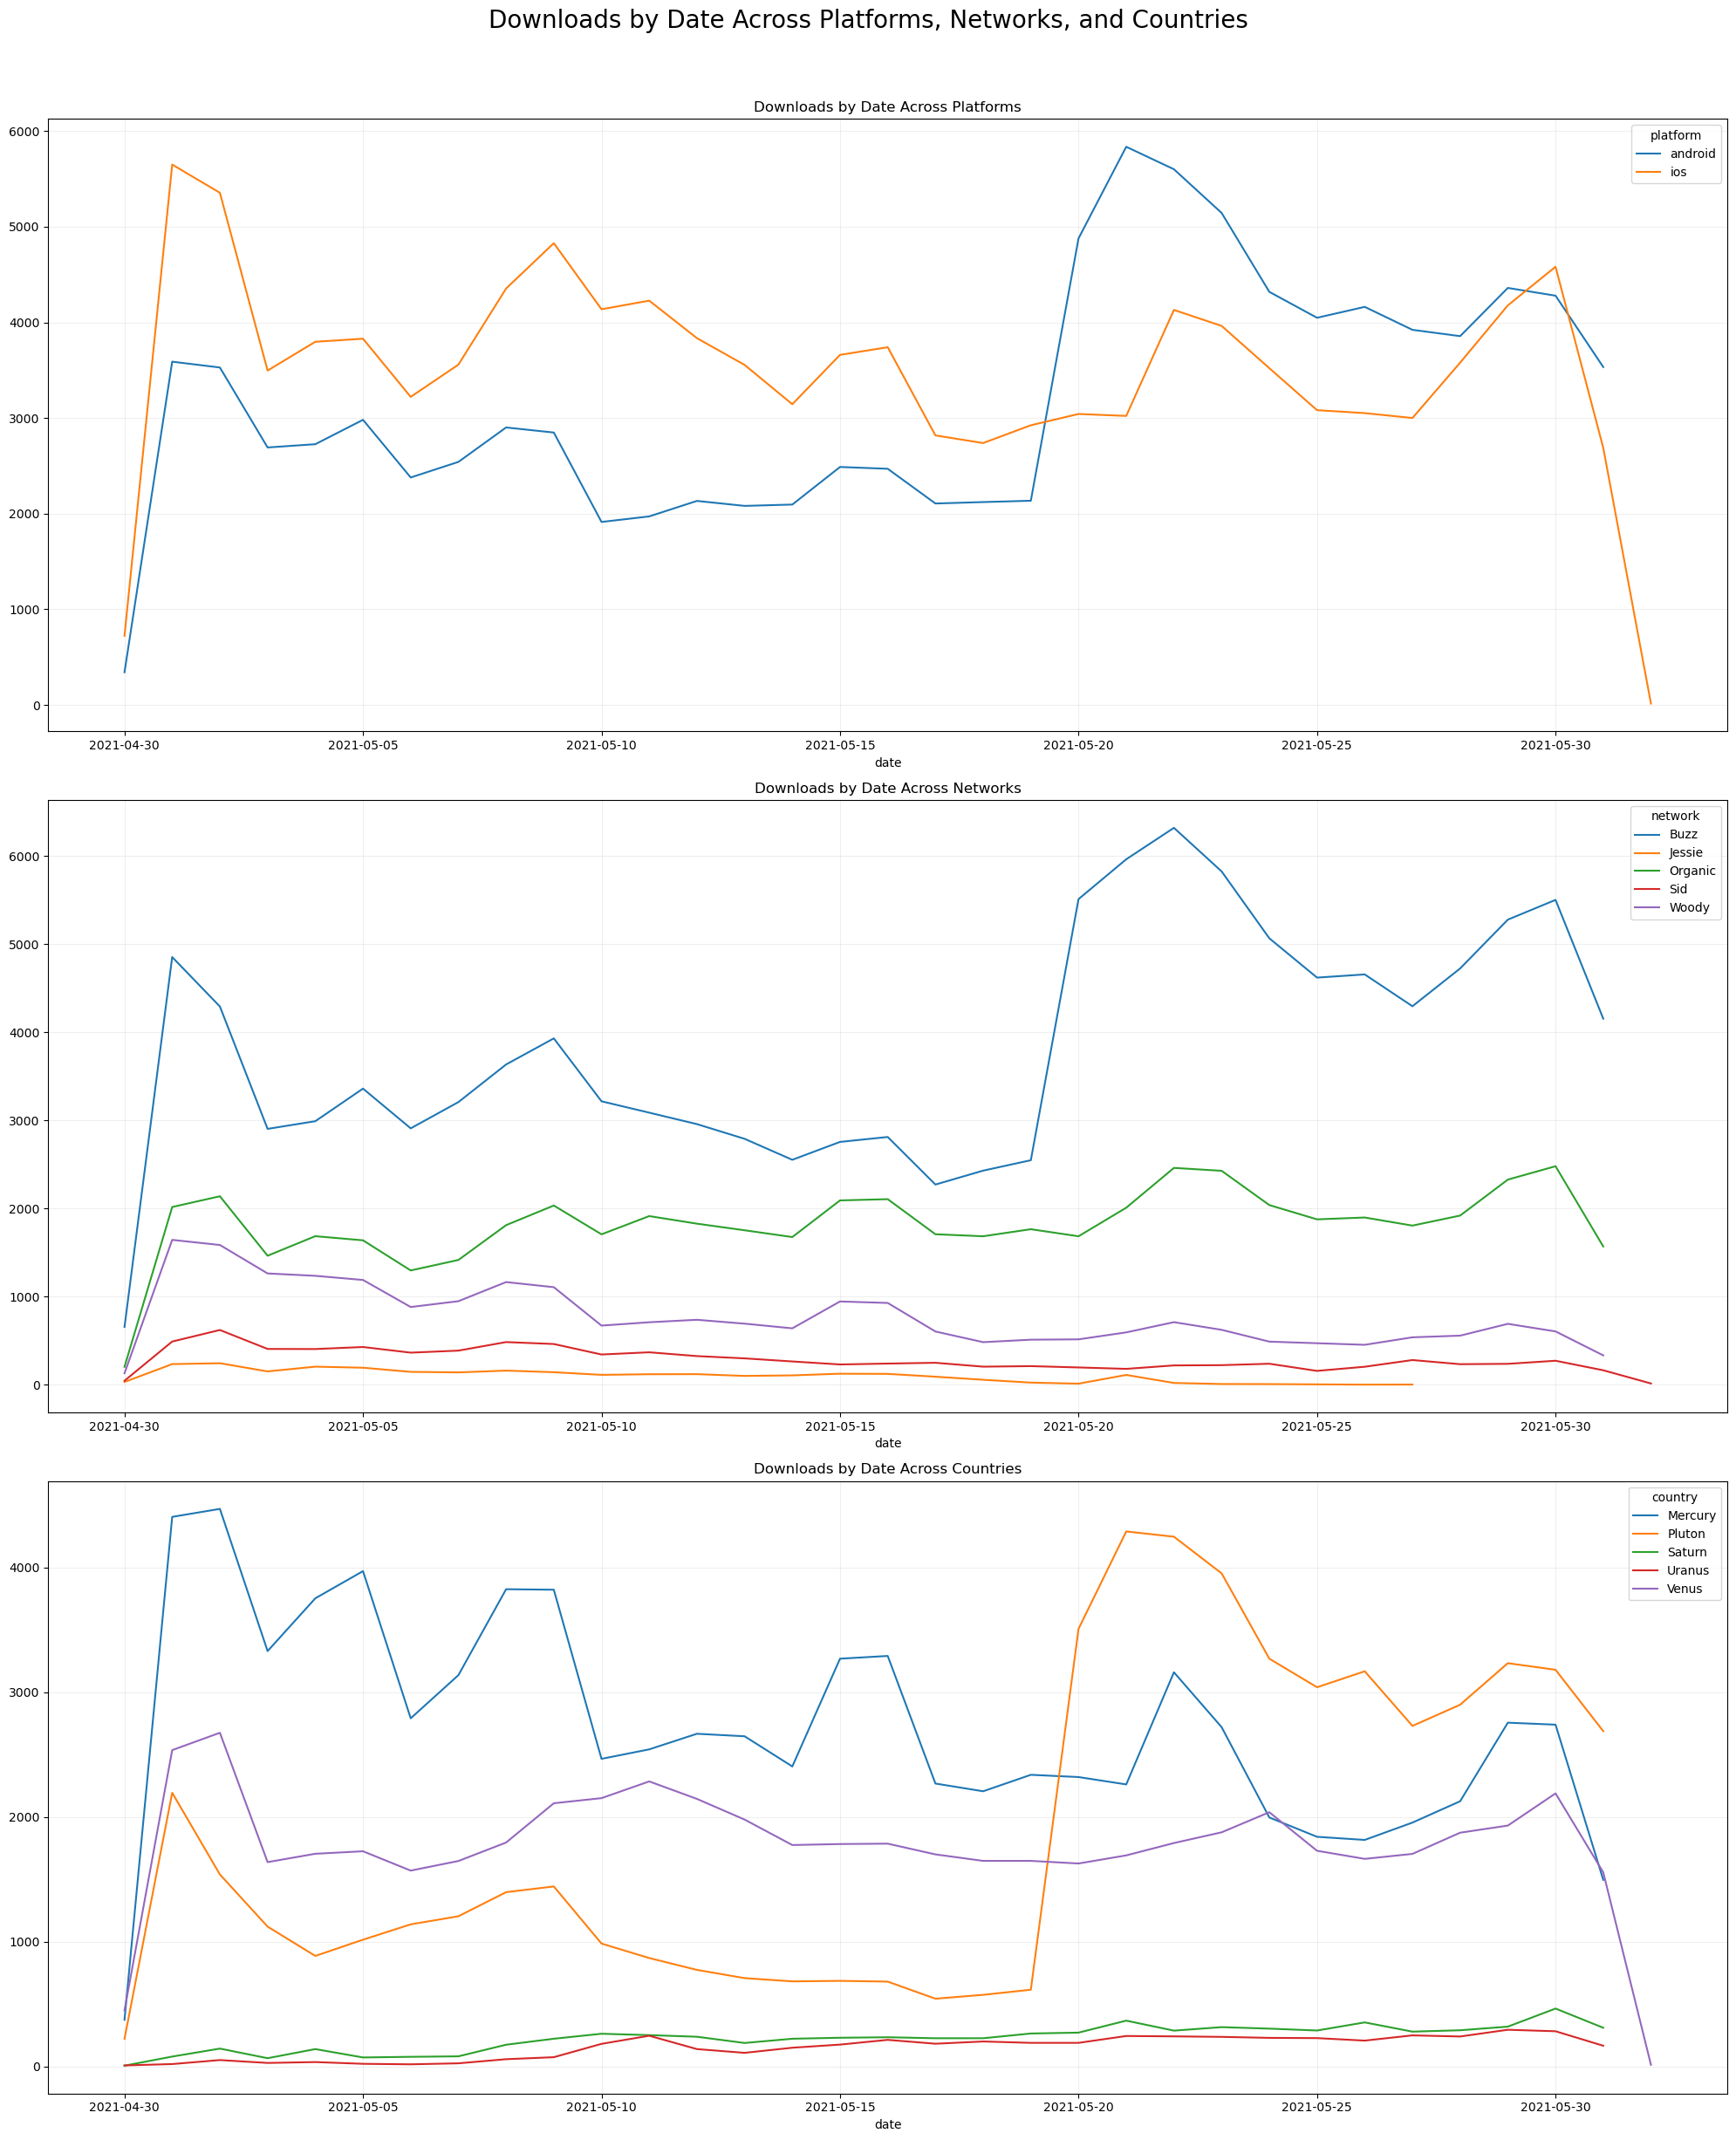

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(20,3*8))
plt.suptitle('Downloads by Date Across Platforms, Networks, and Countries', fontsize=20, y=1.02)

df_installs.pivot_table(index='date', columns='platform', values='download_count', aggfunc='sum').plot(ax=ax[0])
ax[0].set_title('Downloads by Date Across Platforms')
ax[0].grid(True, alpha=0.2)

df_installs.pivot_table(index='date', columns='network', values='download_count', aggfunc='sum').plot(ax=ax[1])
ax[1].set_title('Downloads by Date Across Networks')
ax[1].grid(True, alpha=0.2)

df_installs.pivot_table(index='date', columns='country', values='download_count', aggfunc='sum').plot(ax=ax[2])
ax[2].set_title('Downloads by Date Across Countries')
ax[2].grid(True, alpha=0.2) 

plt.tight_layout()
plt.show()

We can observe a spike in the Buzz network on the second graph between 20-05-21 and 25-05-21, which is mirrored in the marketing cost graph. That spike resulted in a higher install rate for Android compared to iOS, affecting the overall trend. Notably, daily installs are nearly triplet after that spike in Pluto which refers to an effective marketing operation with increasing "Cost per Install (CPI)" in pluto. The acquisition from Mercury needs to be considered by marketing team since it shows a downward trend, despite being our largest user population.

# <center>MARKETING

In [7]:
query_cpi_by_country = """
SELECT 
    DATE(dc.date) AS date,
    dc.country,
    SUM(dc.cost) AS total_cost,
    COUNT(i.user_id) AS total_installs,
    (SUM(dc.cost) / COUNT(i.user_id)) AS CPI
FROM 
    `casedreamgames.Analytics.dataset_cost` dc
JOIN 
    `casedreamgames.Analytics.dataset_install` i ON dc.network = i.network AND dc.platform = i.platform AND dc.country = i.country
GROUP BY 
    dc.date, dc.country
"""

df_cpi_by_country = connection.query(query_cpi_by_country).to_dataframe()

query_cpi_by_network = """
SELECT 
    DATE(dc.date) AS date,
    dc.network,
    SUM(dc.cost) AS total_cost,
    COUNT(i.user_id) AS total_installs,
    (SUM(dc.cost) / COUNT(i.user_id)) AS CPI
FROM 
    `casedreamgames.Analytics.dataset_cost` dc
JOIN 
    `casedreamgames.Analytics.dataset_install` i ON dc.network = i.network AND dc.platform = i.platform AND dc.country = i.country
GROUP BY 
    dc.date, dc.network
"""

df_cpi_by_network = connection.query(query_cpi_by_network).to_dataframe()

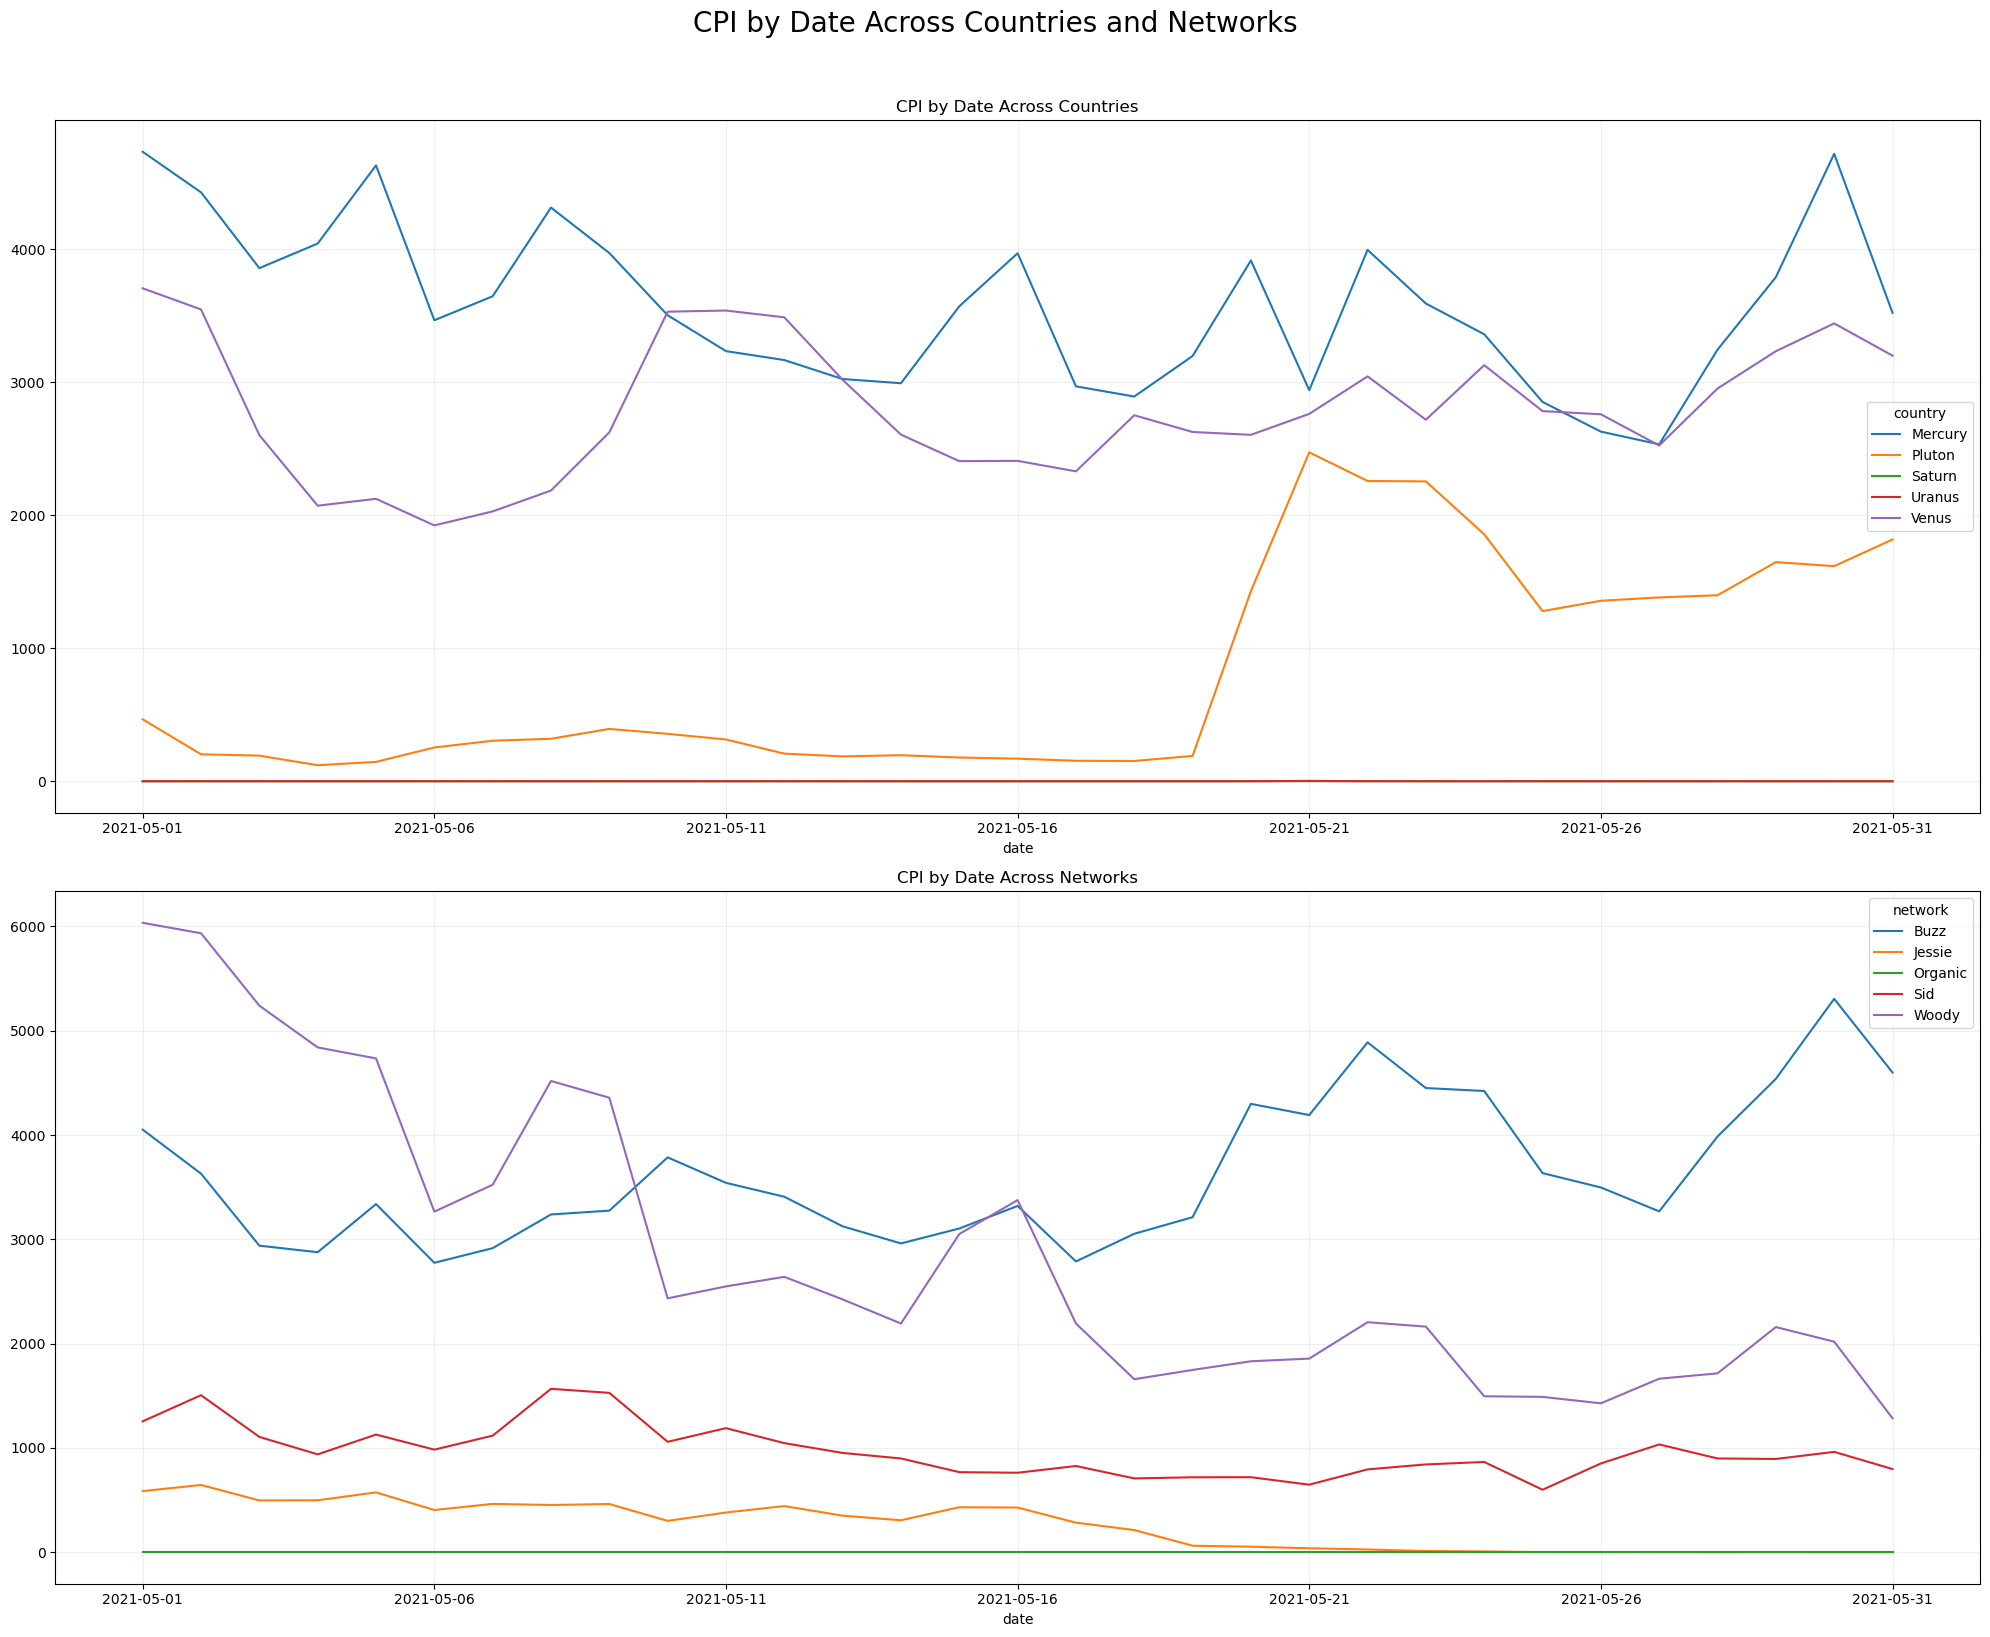

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(20,2*8))
plt.suptitle('CPI by Date Across Countries and Networks', fontsize=20, y=1.02)

df_cpi_by_country.pivot_table(index='date', columns='country', values='CPI', aggfunc='mean').plot(ax=ax[0])
ax[0].set_title('CPI by Date Across Countries')
ax[0].grid(True, alpha=0.2)

df_cpi_by_network.pivot_table(index='date', columns='network', values='CPI', aggfunc='mean').plot(ax=ax[1])
ax[1].set_title('CPI by Date Across Networks')
ax[1].grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

The near-zero marketing spend in Saturn and Uranus should be noted, as they show potential for organic user acquisition. Buzz acquisition shows a highly correlated trend with marketing spend, indicating effective marketing operations. Meanwhile, Venus has maintained its acquisition level despite a reduction in marketing spend per install.

In [9]:
query_marketing_efforts = """
SELECT date, country, platform, SUM(cost) AS total_cost, network
FROM `casedreamgames.Analytics.dataset_cost`
GROUP BY date, country, platform, network
"""
df_marketing_efforts = connection.query(query_marketing_efforts).to_dataframe()

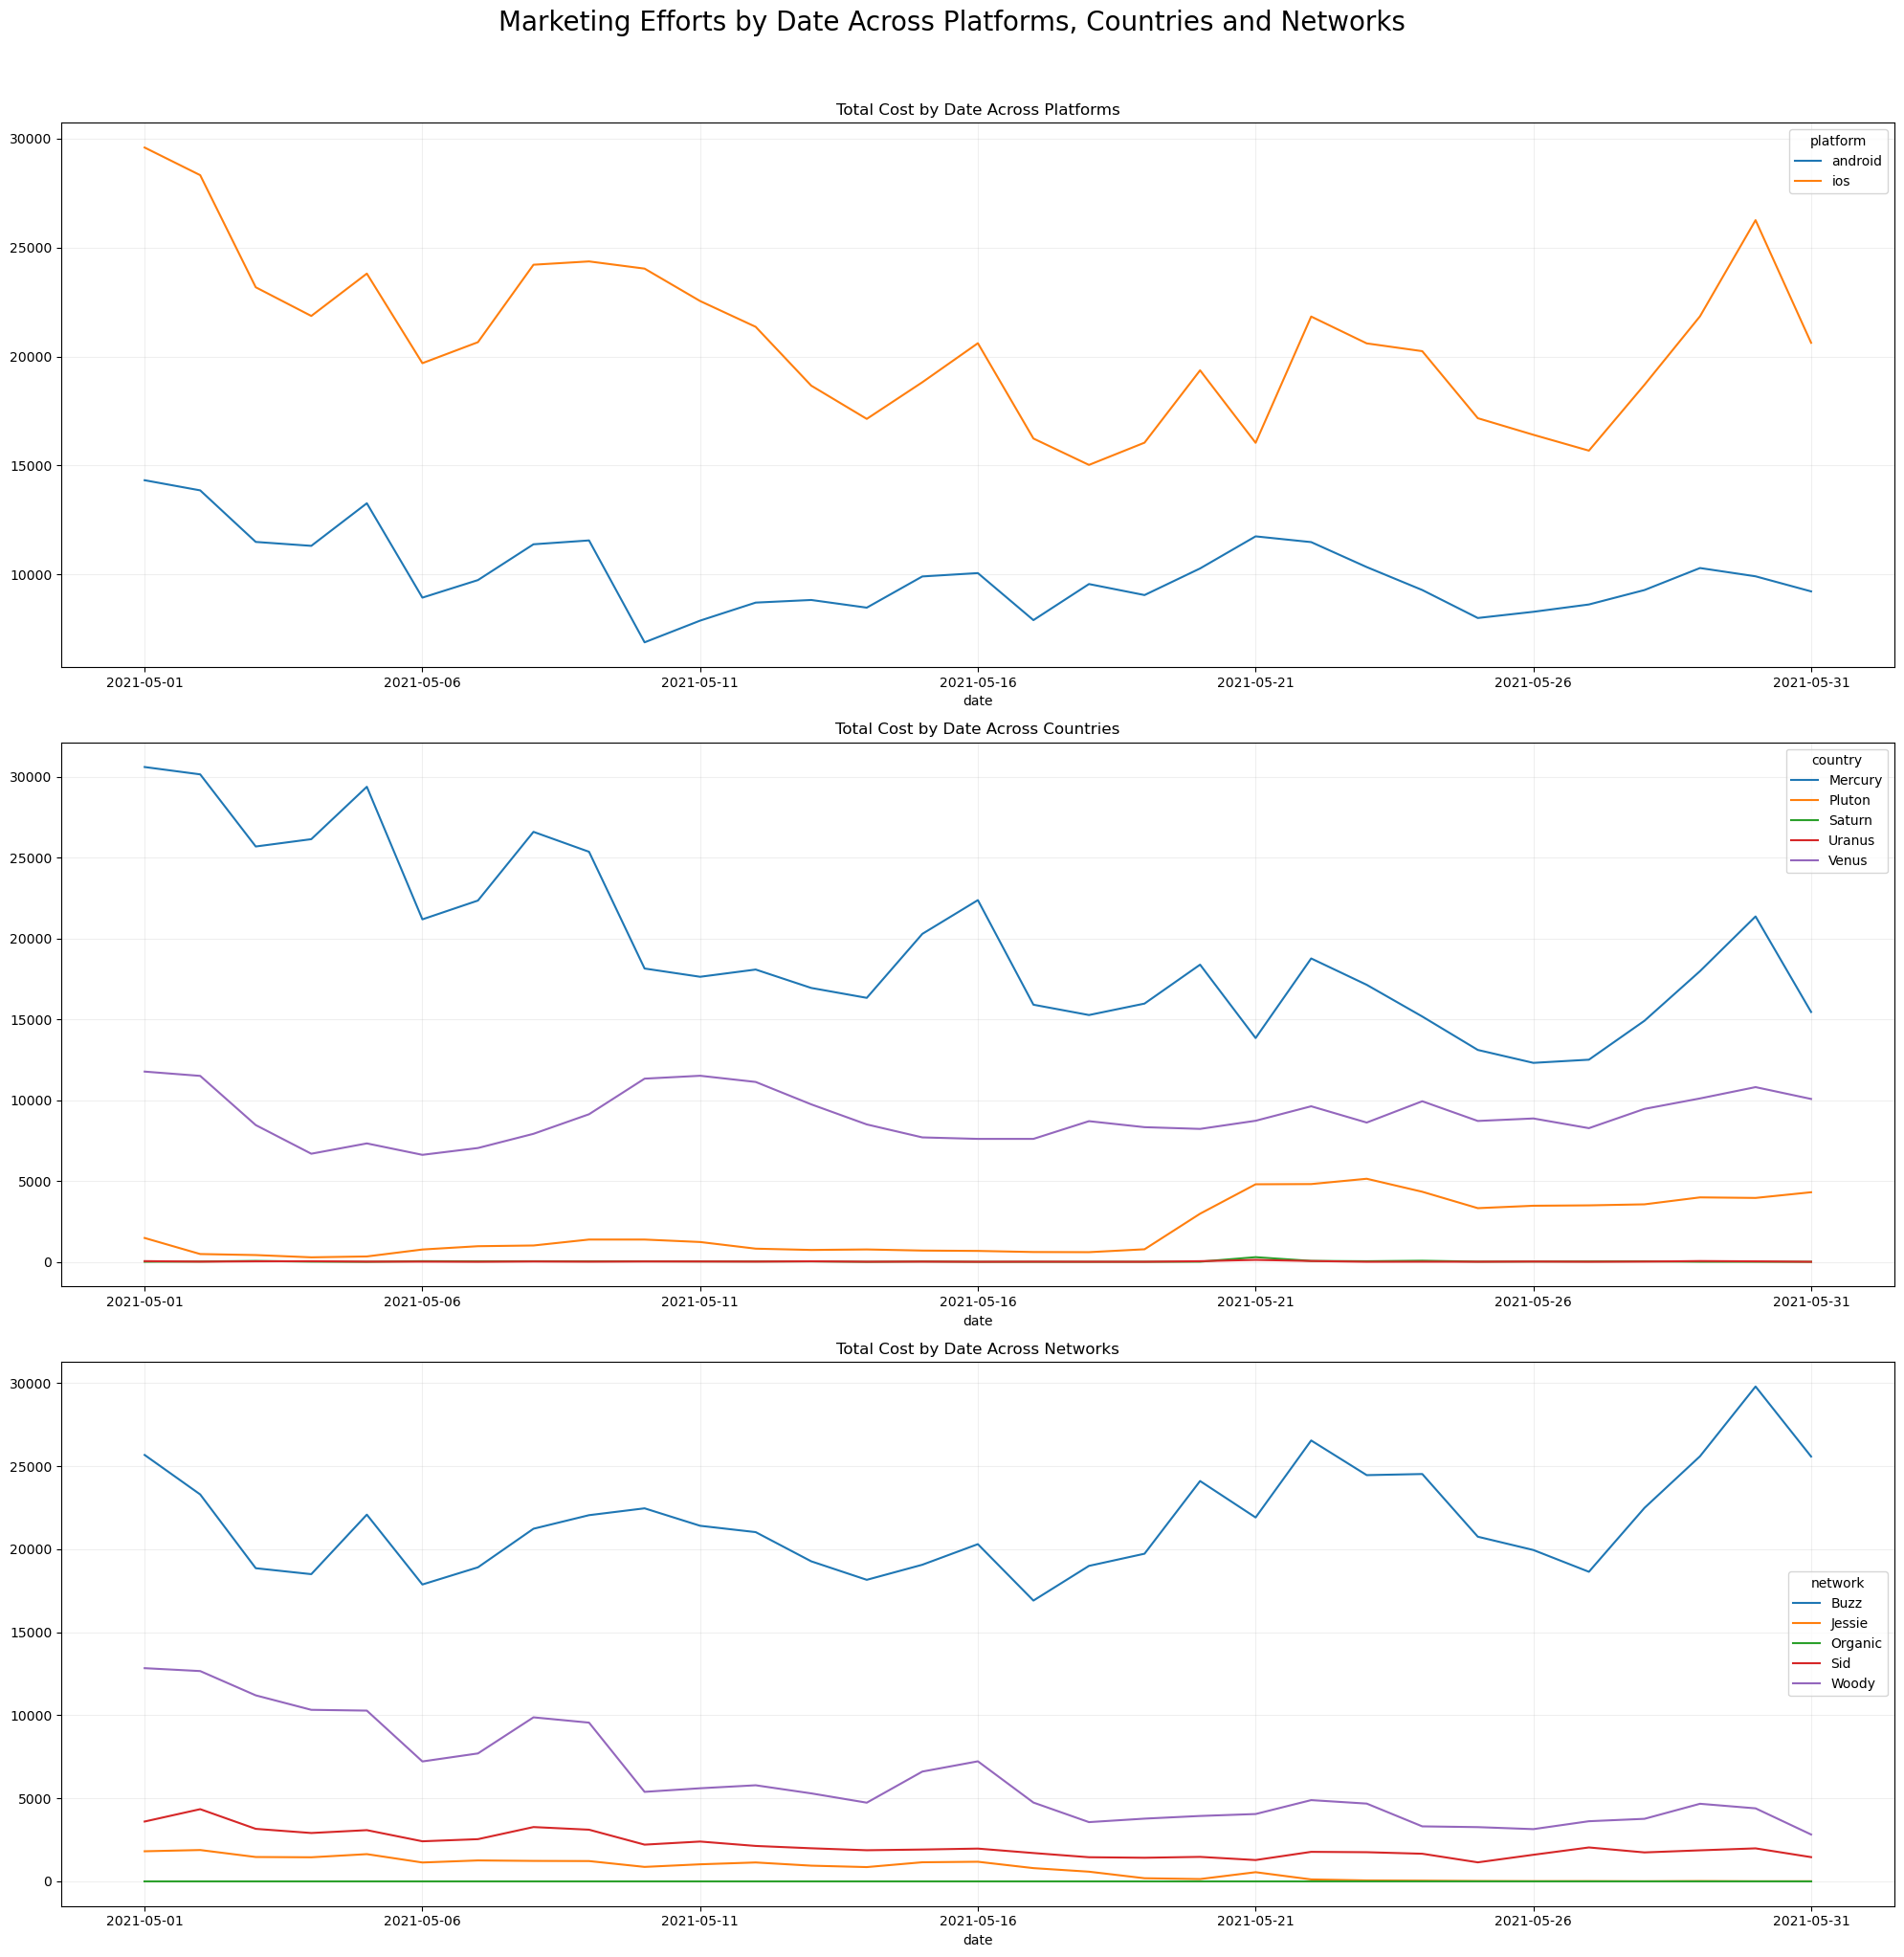

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(20,20))
plt.suptitle('Marketing Efforts by Date Across Platforms, Countries and Networks', fontsize=20, y=1.02)

df_marketing_efforts.pivot_table(index='date', columns='platform', values='total_cost', aggfunc='sum').plot(ax=ax[0])
ax[0].set_title('Total Cost by Date Across Platforms')
ax[0].grid(True, alpha=0.2)

df_marketing_efforts.pivot_table(index='date', columns='country', values='total_cost', aggfunc='sum').plot(ax=ax[1])
ax[1].set_title('Total Cost by Date Across Countries')
ax[1].grid(True, alpha=0.2)

df_marketing_efforts.pivot_table(index='date', columns='network', values='total_cost', aggfunc='sum').plot(ax=ax[2])
ax[2].set_title('Total Cost by Date Across Networks')
ax[2].grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

While the marketing spend for iOS is increasing, iOS user acquisition remains steady and has been overtaken by Android in install count. Additionally, we are reducing marketing costs in Mercury that , which, in my opinion, should not be done due to its importance for brand recognition among our largest population.

# <center> REVENUE

In [ ]:
query_revenue = """
SELECT 
    i.user_id,
    i.country, 
    i.platform, 
    i.network,   
    SUM(CAST(r.revenue AS FLOAT64)) AS revenue
FROM `casedreamgames.Analytics.dataset_install` i
JOIN `casedreamgames.Analytics.dataset_cost` c 
    ON i.network = c.network 
    AND i.platform = c.platform 
    AND i.country = c.country
JOIN `casedreamgames.Analytics.dataset_revenue` r 
    ON i.user_id = r.user_id

GROUP BY i.user_id, i.country, i.platform, i.network
"""

df_revenue= connection.query(query_revenue).to_dataframe()

In [ ]:
fig = px.sunburst(df_revenue, path=['country', 'platform', 'network'], values='revenue')

fig.update_layout(
    title='Where are our revenues coming from?',
    margin=dict(t=50, l=10, r=10, b=10),
    width=800,
    height=800
)

fig.show()

As expected, our main revenue source is Mercury, followed by Venus. Although Venus and Pluto have a similar number of users, Venus generates four times the revenue, indicating a significant difference in purchasing behavior between the two countries. Additionally, iOS users make more purchases in every country, which should be a focused point in our marketing strategy.

In [44]:
query_revenue_by_date = """
SELECT 
    i.user_id,
    DATE(i.event_time) AS date,
    i.country, 
    i.platform, 
    i.network,   
    SUM(CAST(r.revenue AS FLOAT64)) AS revenue
FROM `casedreamgames.Analytics.dataset_install` i
JOIN `casedreamgames.Analytics.dataset_revenue` r
    ON i.user_id = r.user_id
GROUP BY date, i.country, i.platform, i.network, user_id
"""

df_revenue_by_date= connection.query(query_revenue_by_date).to_dataframe()

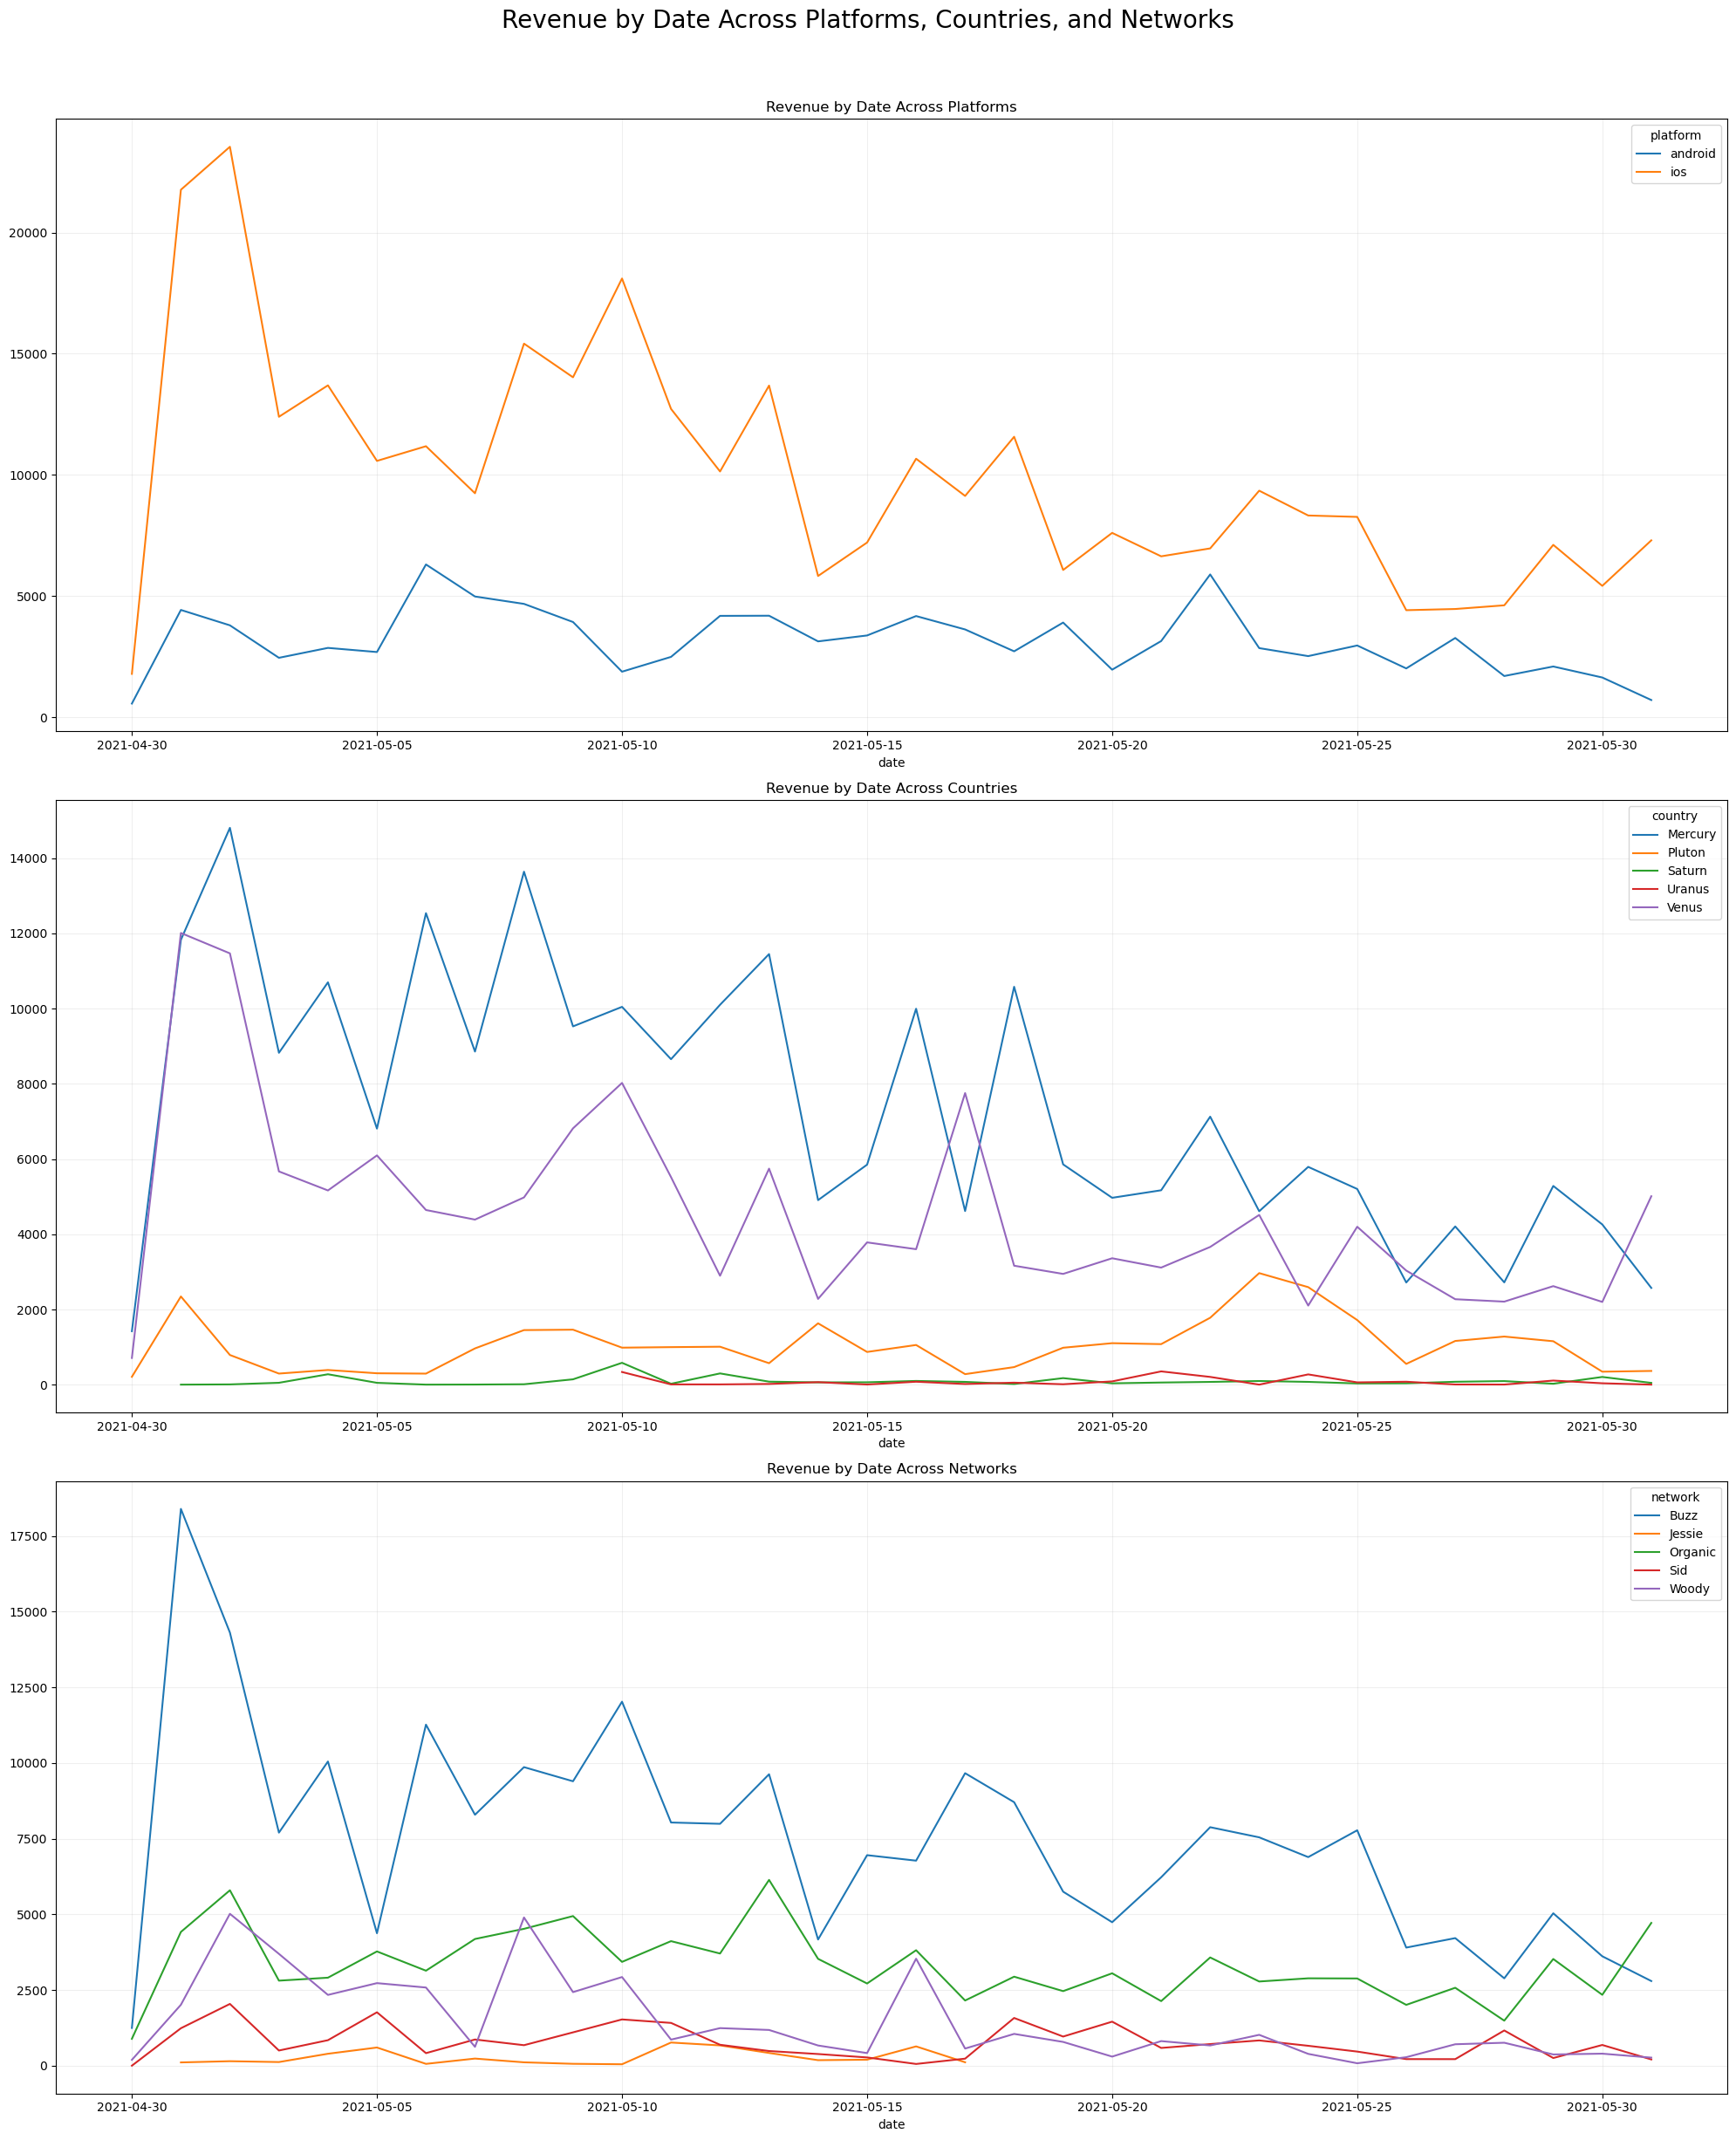

In [47]:
# plot revenue by date across platforms, countries, and networks

fig, ax = plt.subplots(3, 1, figsize=(20,3*8))
plt.suptitle('Revenue by Date Across Platforms, Countries, and Networks', fontsize=20, y=1.02)

df_revenue_by_date.pivot_table(index='date', columns='platform', values='revenue', aggfunc='sum').plot(ax=ax[0])
ax[0].set_title('Revenue by Date Across Platforms')
ax[0].grid(True, alpha=0.2)

df_revenue_by_date.pivot_table(index='date', columns='country', values='revenue', aggfunc='sum').plot(ax=ax[1])
ax[1].set_title('Revenue by Date Across Countries')
ax[1].grid(True, alpha=0.2)

df_revenue_by_date.pivot_table(index='date', columns='network', values='revenue', aggfunc='sum').plot(ax=ax[2])
ax[2].set_title('Revenue by Date Across Networks')
ax[2].grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

Purchases by users from nearly every channel is in downward trend and fluctuates. iOS consistently generates more revenue than Android throughout the period which i mentioned in the part before. Mercury and venus became similar at the end of period. Significant revenue drop is observed for users acquired from Buzz network.

In [11]:
query_avg_coin = """
SELECT
    level,
    platform,
    AVG(coin_amount) AS avg_coin_spent,
    spending_type
FROM `casedreamgames.Analytics.dataset_coin_spend`
GROUP BY level, platform, spending_type
ORDER BY level, platform, spending_type;
"""

df_avg_coin = connection.query(query_avg_coin).to_dataframe()

In [12]:
pivot_table = df_avg_coin.pivot_table(index='level', columns=['platform', 'spending_type'], values='avg_coin_spent', aggfunc='sum')

pivot_table.reset_index(inplace=True)

df = pivot_table.melt(id_vars='level', var_name=['Platform', 'Spending Type'], value_name='Avg Coin Spent')

def add_annotations(fig, df, threshold_multiplier=2):
    mean_spent = df['Avg Coin Spent'].mean()
    std_spent = df['Avg Coin Spent'].std()
    
    upper_threshold = mean_spent + threshold_multiplier * std_spent
    lower_threshold = mean_spent - threshold_multiplier * std_spent


    annotations_df = df[(df['Avg Coin Spent'] > upper_threshold) | (df['Avg Coin Spent'] < lower_threshold)]
    
    for i, row in annotations_df.iterrows():
        fig.add_annotation(x=row['level'], y=row['Avg Coin Spent'],
                           text=f"Level {row['level']}",
                           showarrow=True, arrowhead=1, arrowsize=1, arrowwidth=2, arrowcolor='red')

for (platform, spending_type), group_data in df.groupby(['Platform', 'Spending Type']):
    fig = px.line(group_data, x='level', y='Avg Coin Spent', title=f'Average Coin Spent by Level - {platform} {spending_type}',
                  labels={"level": "Level", "Avg Coin Spent": "Average Coin Spent"},
                  hover_data={'level': True, 'Avg Coin Spent': True})
    
    add_annotations(fig, group_data)
    
    fig.update_layout(xaxis_title='Level', yaxis_title='Average Coin Spent', legend_title=f"{platform} - {spending_type}")
    fig.show()


In these graphs, I highlighted levels with average spending below or above a 2 Z score. Level spending is higher for levels above 400, while booster spending is more evenly distributed across levels, with spikes approximately every 50 levels. A very niche finding is that Level 903 is the only level below two standard deviations of the average level spending of ios and android, which requires further analysis, such as examining the average number of moves left when achieving a winning status.

# <center>ENGAGEMENT 

In [15]:
query_dau = """ 
SELECT
    DATE(s.event_time) AS date,
    i.country,
    i.platform,
    i.network,
    COUNT(DISTINCT s.user_id) AS Daily_Active_Users
FROM `casedreamgames.Analytics.dataset_session` s
JOIN `casedreamgames.Analytics.dataset_install` i
    ON s.user_id = i.user_id
GROUP BY date, i.country, i.platform, i.network
ORDER BY date, i.country, i.platform, i.network; 
"""

df_dau = connection.query(query_dau).to_dataframe()

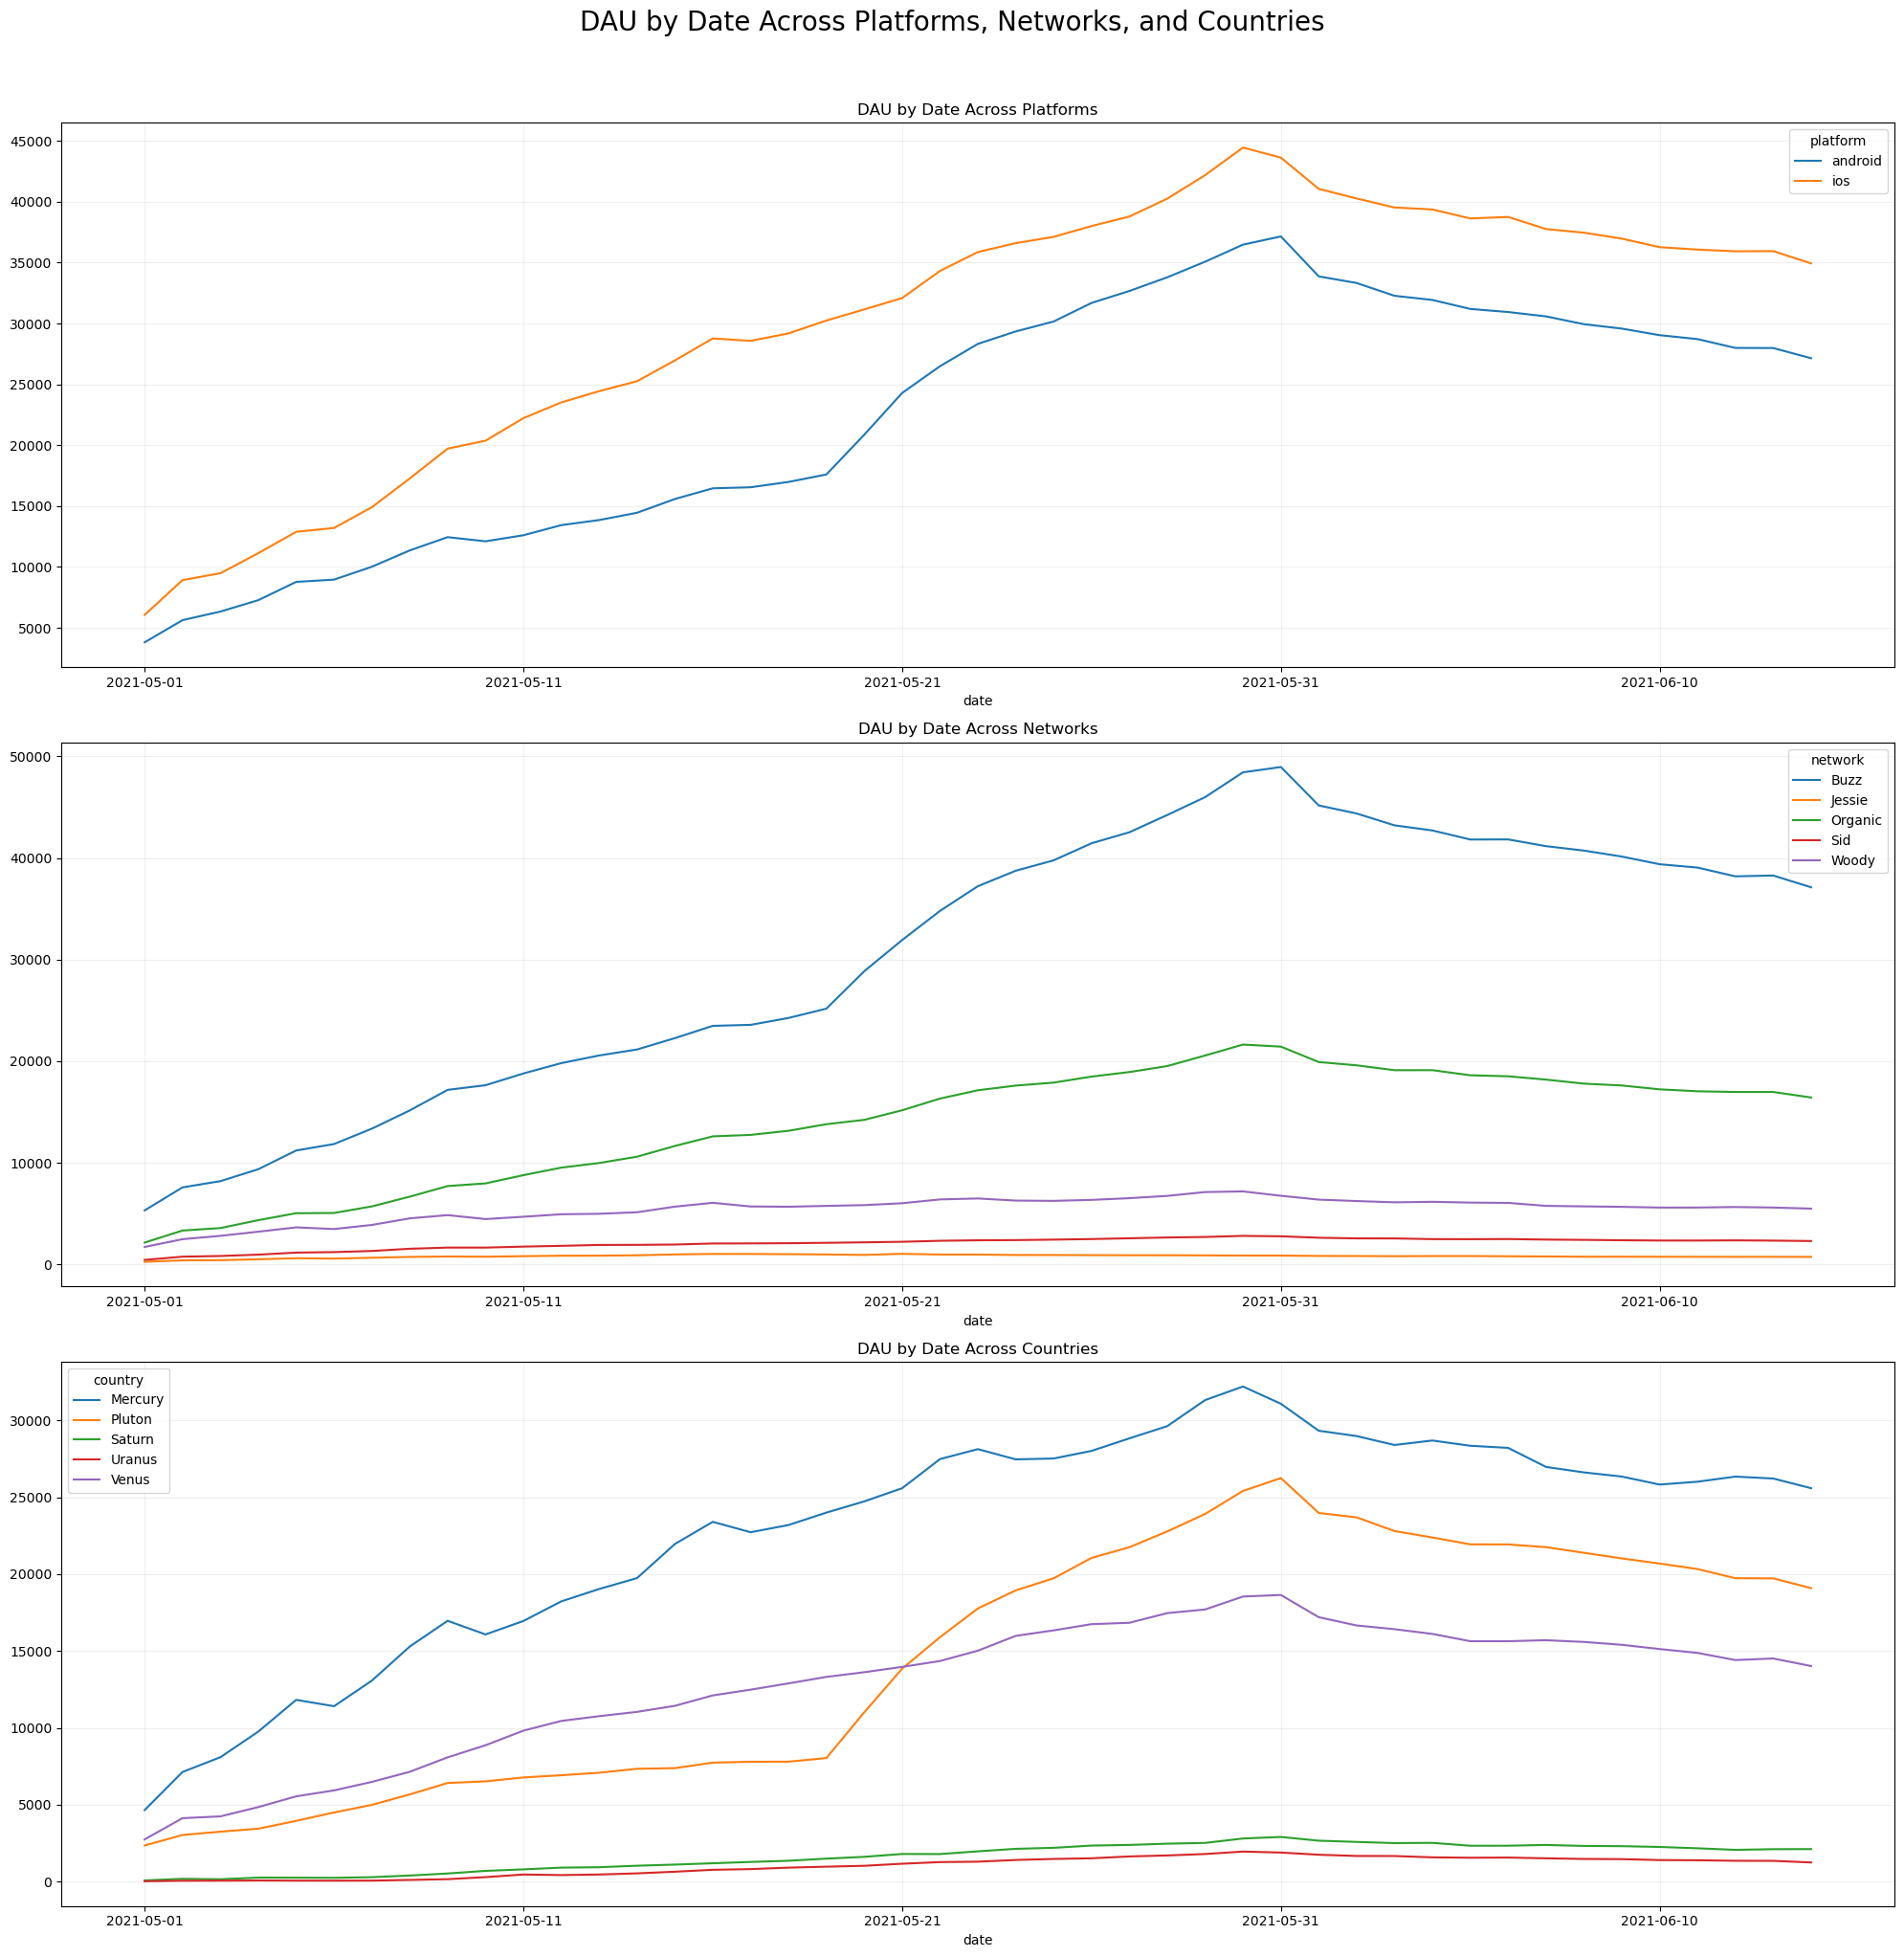

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(20,20))
plt.suptitle('DAU by Date Across Platforms, Networks, and Countries', fontsize=20, y=1.02)

df_dau.pivot_table(index='date', columns='platform', values='Daily_Active_Users', aggfunc='sum')\
    .iloc[1:, :]\
    .plot(ax=ax[0])
ax[0].set_title('DAU by Date Across Platforms')
ax[0].grid(True, alpha=0.2)

df_dau.pivot_table(index='date', columns='network', values='Daily_Active_Users', aggfunc='sum')\
    .iloc[1:, :]\
    .plot(ax=ax[1])
ax[1].set_title('DAU by Date Across Networks')
ax[1].grid(True, alpha=0.2)

df_dau.pivot_table(index='date', columns='country', values='Daily_Active_Users', aggfunc='sum')\
    .iloc[1:, :]\
    .plot(ax=ax[2])
ax[2].set_title('DAU by Date Across Countries')
ax[2].grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

Daily activity of iOS outperforms Android throughout the period. Given that DAU (Daily Active Users) is a crucial metric for investors, we should take action to maintain this trend. A significant drop is observed starting on 31-05-21. While this study does not provide a clear reason, I can brainstorm based on my personal gaming experience. Possible causes could include an in-game event that was not well-received, an unpopular update, or a major unseen and unresolved bug.

In [49]:
query_mau = """
SELECT
    FORMAT_DATE('%Y-%m', DATE(s.event_time)) AS month,
    i.country,
    i.platform,
    i.network,
    COUNT(DISTINCT s.user_id) AS Monthly_Active_Users
FROM `casedreamgames.Analytics.dataset_session` s
JOIN `casedreamgames.Analytics.dataset_install` i
    ON s.user_id = i.user_id
GROUP BY month, i.country, i.platform, i.network
ORDER BY month, i.country, i.platform, i.network;
"""

df_mau = connection.query(query_mau).to_dataframe()

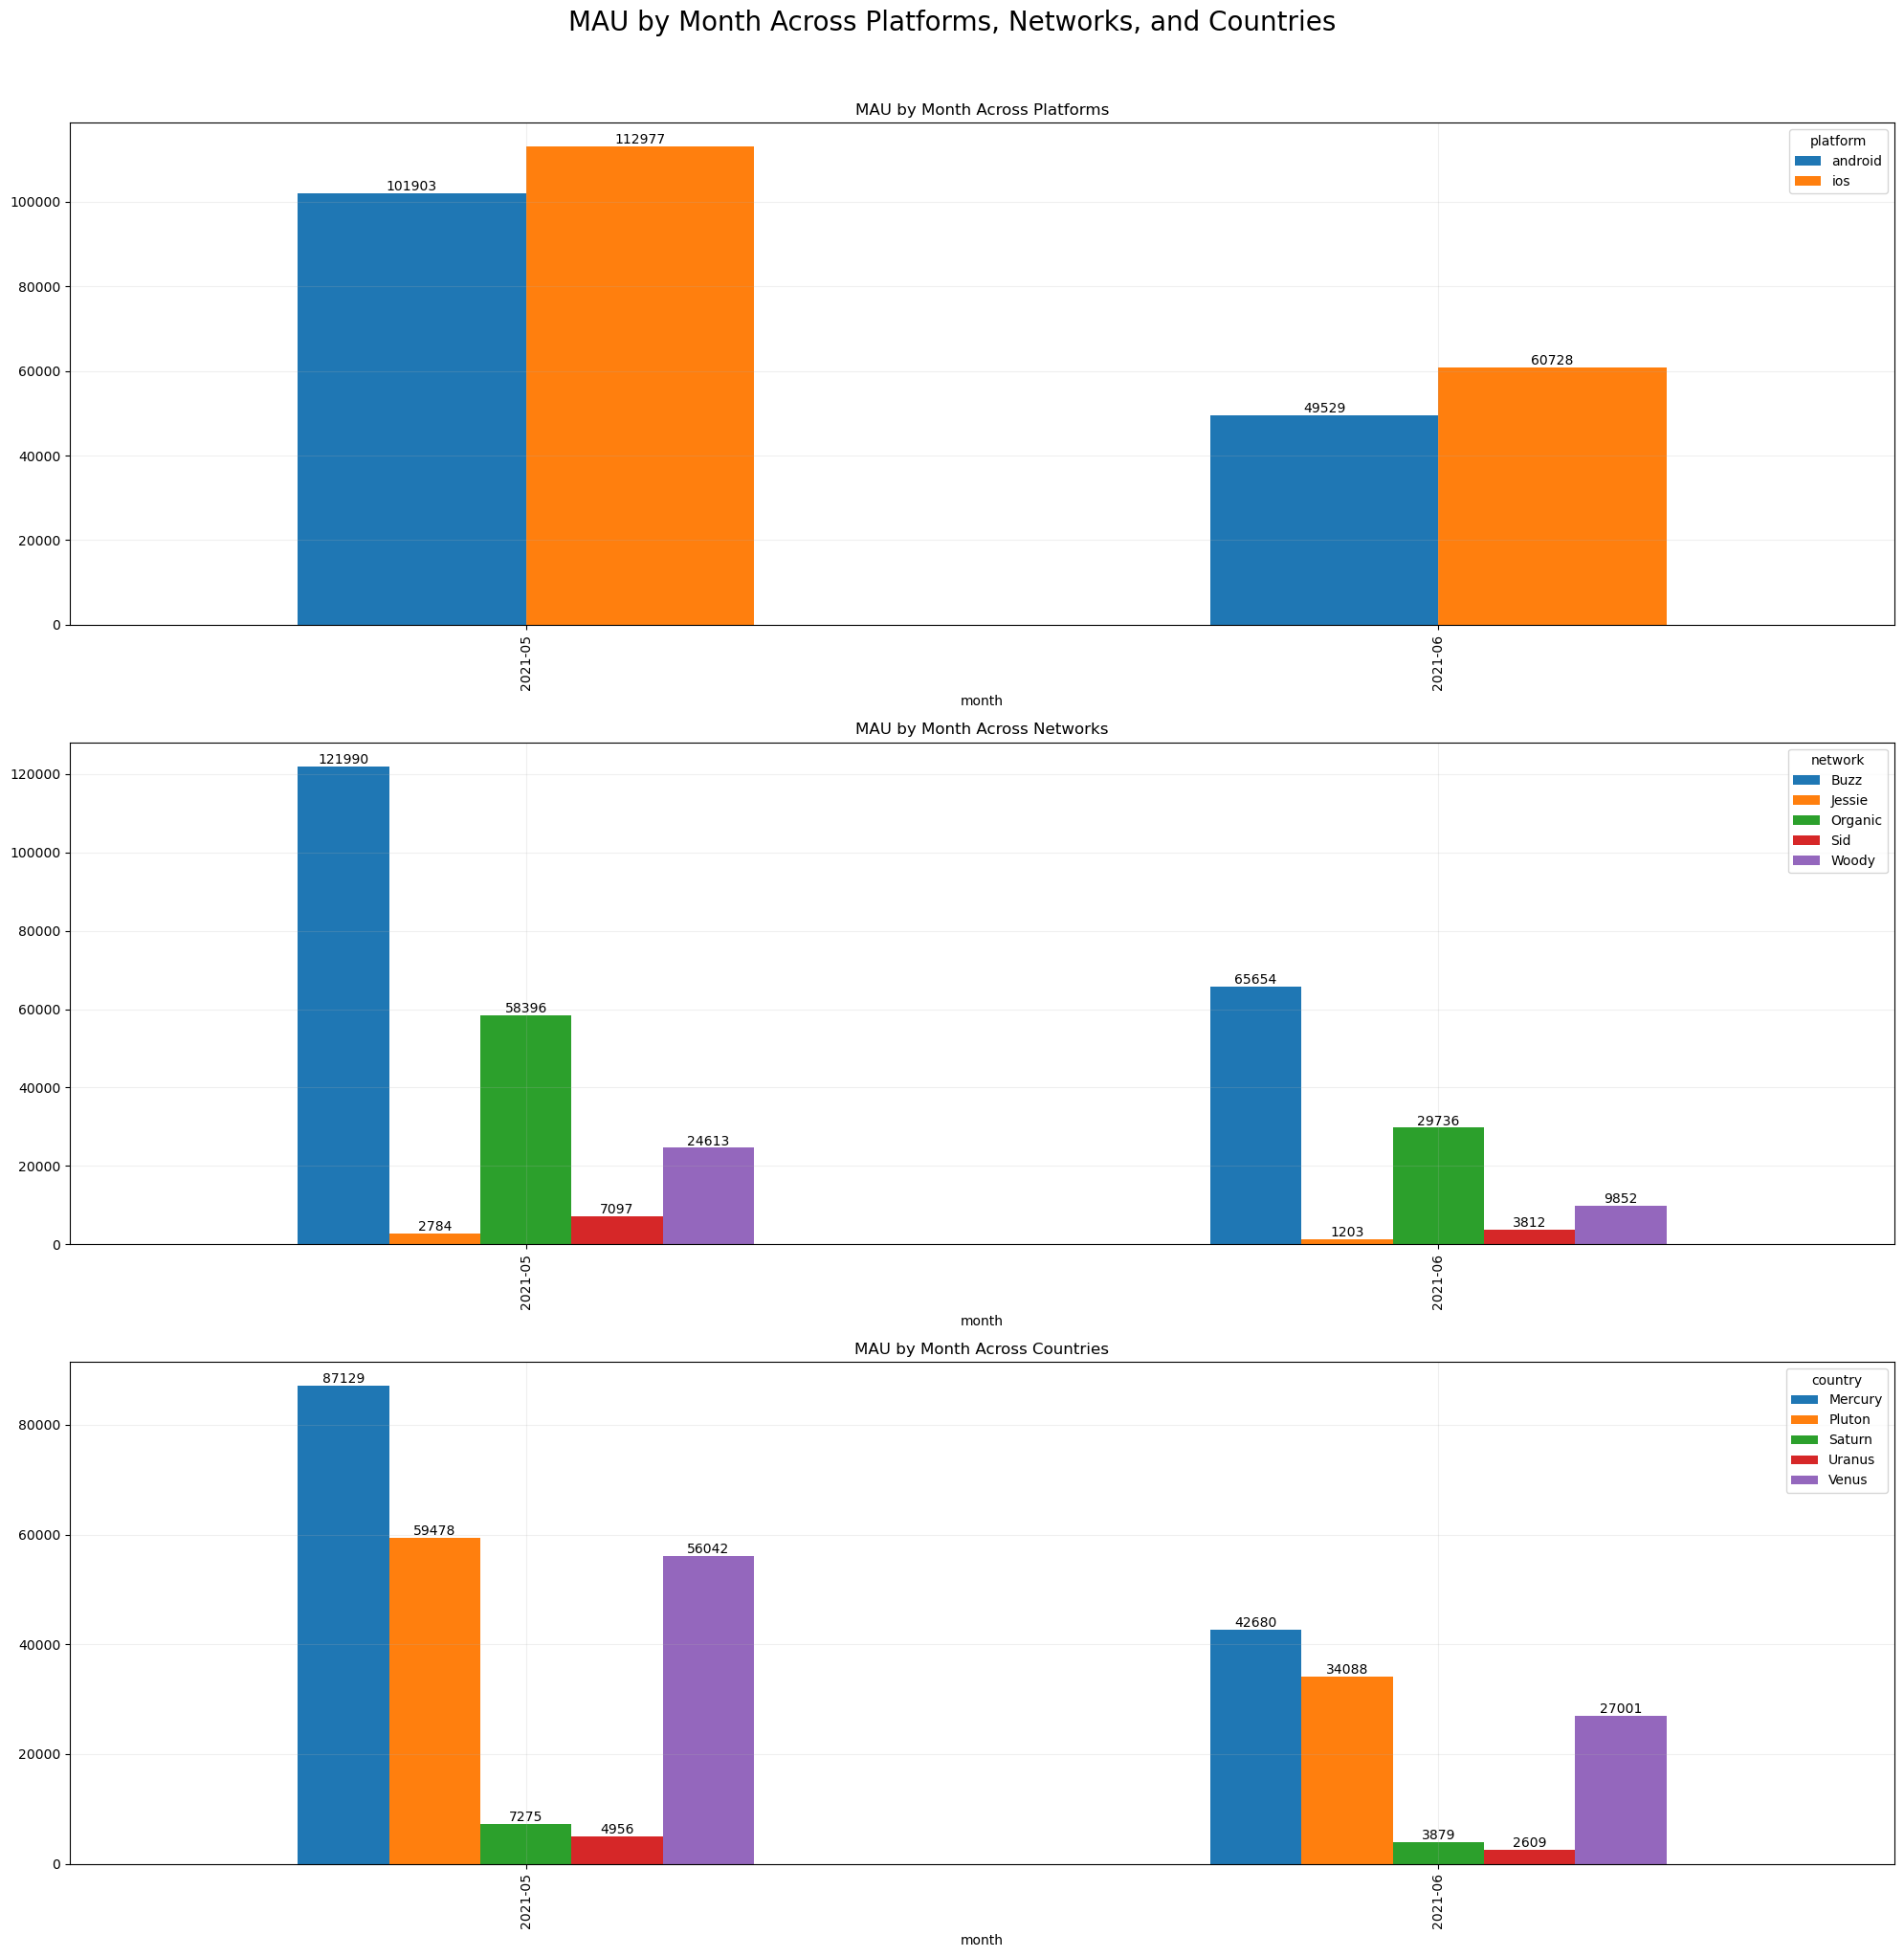

In [50]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
plt.suptitle('MAU by Month Across Platforms, Networks, and Countries', fontsize=20, y=1.02)

df_platform = df_mau.pivot_table(index='month', columns='platform', values='Monthly_Active_Users', aggfunc='sum').iloc[1:, :]
platform_plot = df_platform.plot(kind='bar', ax=ax[0])
ax[0].set_title('MAU by Month Across Platforms')
ax[0].grid(True, alpha=0.2)

for p in platform_plot.patches:
    ax[0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')

df_network = df_mau.pivot_table(index='month', columns='network', values='Monthly_Active_Users', aggfunc='sum').iloc[1:, :]
network_plot = df_network.plot(kind='bar', ax=ax[1])
ax[1].set_title('MAU by Month Across Networks')
ax[1].grid(True, alpha=0.2)

for p in network_plot.patches:
    ax[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')

df_country = df_mau.pivot_table(index='month', columns='country', values='Monthly_Active_Users', aggfunc='sum').iloc[1:, :]
country_plot = df_country.plot(kind='bar', ax=ax[2])
ax[2].set_title('MAU by Month Across Countries')
ax[2].grid(True, alpha=0.2)

for p in country_plot.patches:
    ax[2].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


Similarly in DAU Analysis,  we can observe drop through the period clearly.

In [19]:
query_retention = """
WITH InstallData AS (
    SELECT
        user_id,
        MIN(event_time) AS first_install_date,
        network,
        country
    FROM `casedreamgames.Analytics.dataset_install`
    GROUP BY user_id, network, country
),
SessionData AS (
    SELECT
        user_id,
        MIN(event_time) AS first_session_date
    FROM `casedreamgames.Analytics.dataset_session`
    GROUP BY user_id
),
FirstActivity AS (
    SELECT
        i.user_id,
        i.first_install_date,
        s.first_session_date,
        GREATEST(i.first_install_date, s.first_session_date) AS true_first_session_date,
        i.network,
        i.country
    FROM InstallData i
    JOIN SessionData s ON i.user_id = s.user_id
),
Retention AS (
    SELECT
        fa.user_id,
        fa.true_first_session_date,
        fa.network,
        fa.country,
        MAX(CASE WHEN DATE_DIFF(s.event_time, fa.true_first_session_date, DAY) = 1 THEN 1 ELSE 0 END) AS Day1,
        MAX(CASE WHEN DATE_DIFF(s.event_time, fa.true_first_session_date, DAY) = 7 THEN 1 ELSE 0 END) AS Day7,
        MAX(CASE WHEN DATE_DIFF(s.event_time, fa.true_first_session_date, DAY) = 15 THEN 1 ELSE 0 END) AS Day15,
        MAX(CASE WHEN DATE_DIFF(s.event_time, fa.true_first_session_date, DAY) = 30 THEN 1 ELSE 0 END) AS Day30
    FROM FirstActivity fa
    JOIN `casedreamgames.Analytics.dataset_session` s ON fa.user_id = s.user_id
    WHERE s.event_time >= fa.true_first_session_date -- Only count sessions after install date
    GROUP BY fa.user_id, fa.true_first_session_date, fa.network, fa.country
)
SELECT
    network,
    country,
    AVG(Day1) AS Day1_Retention,
    AVG(Day7) AS Day7_Retention,
    AVG(Day15) AS Day15_Retention,
    AVG(Day30) AS Day30_Retention
FROM Retention
GROUP BY network, country;
"""

df_retention = connection.query(query_retention).to_dataframe()

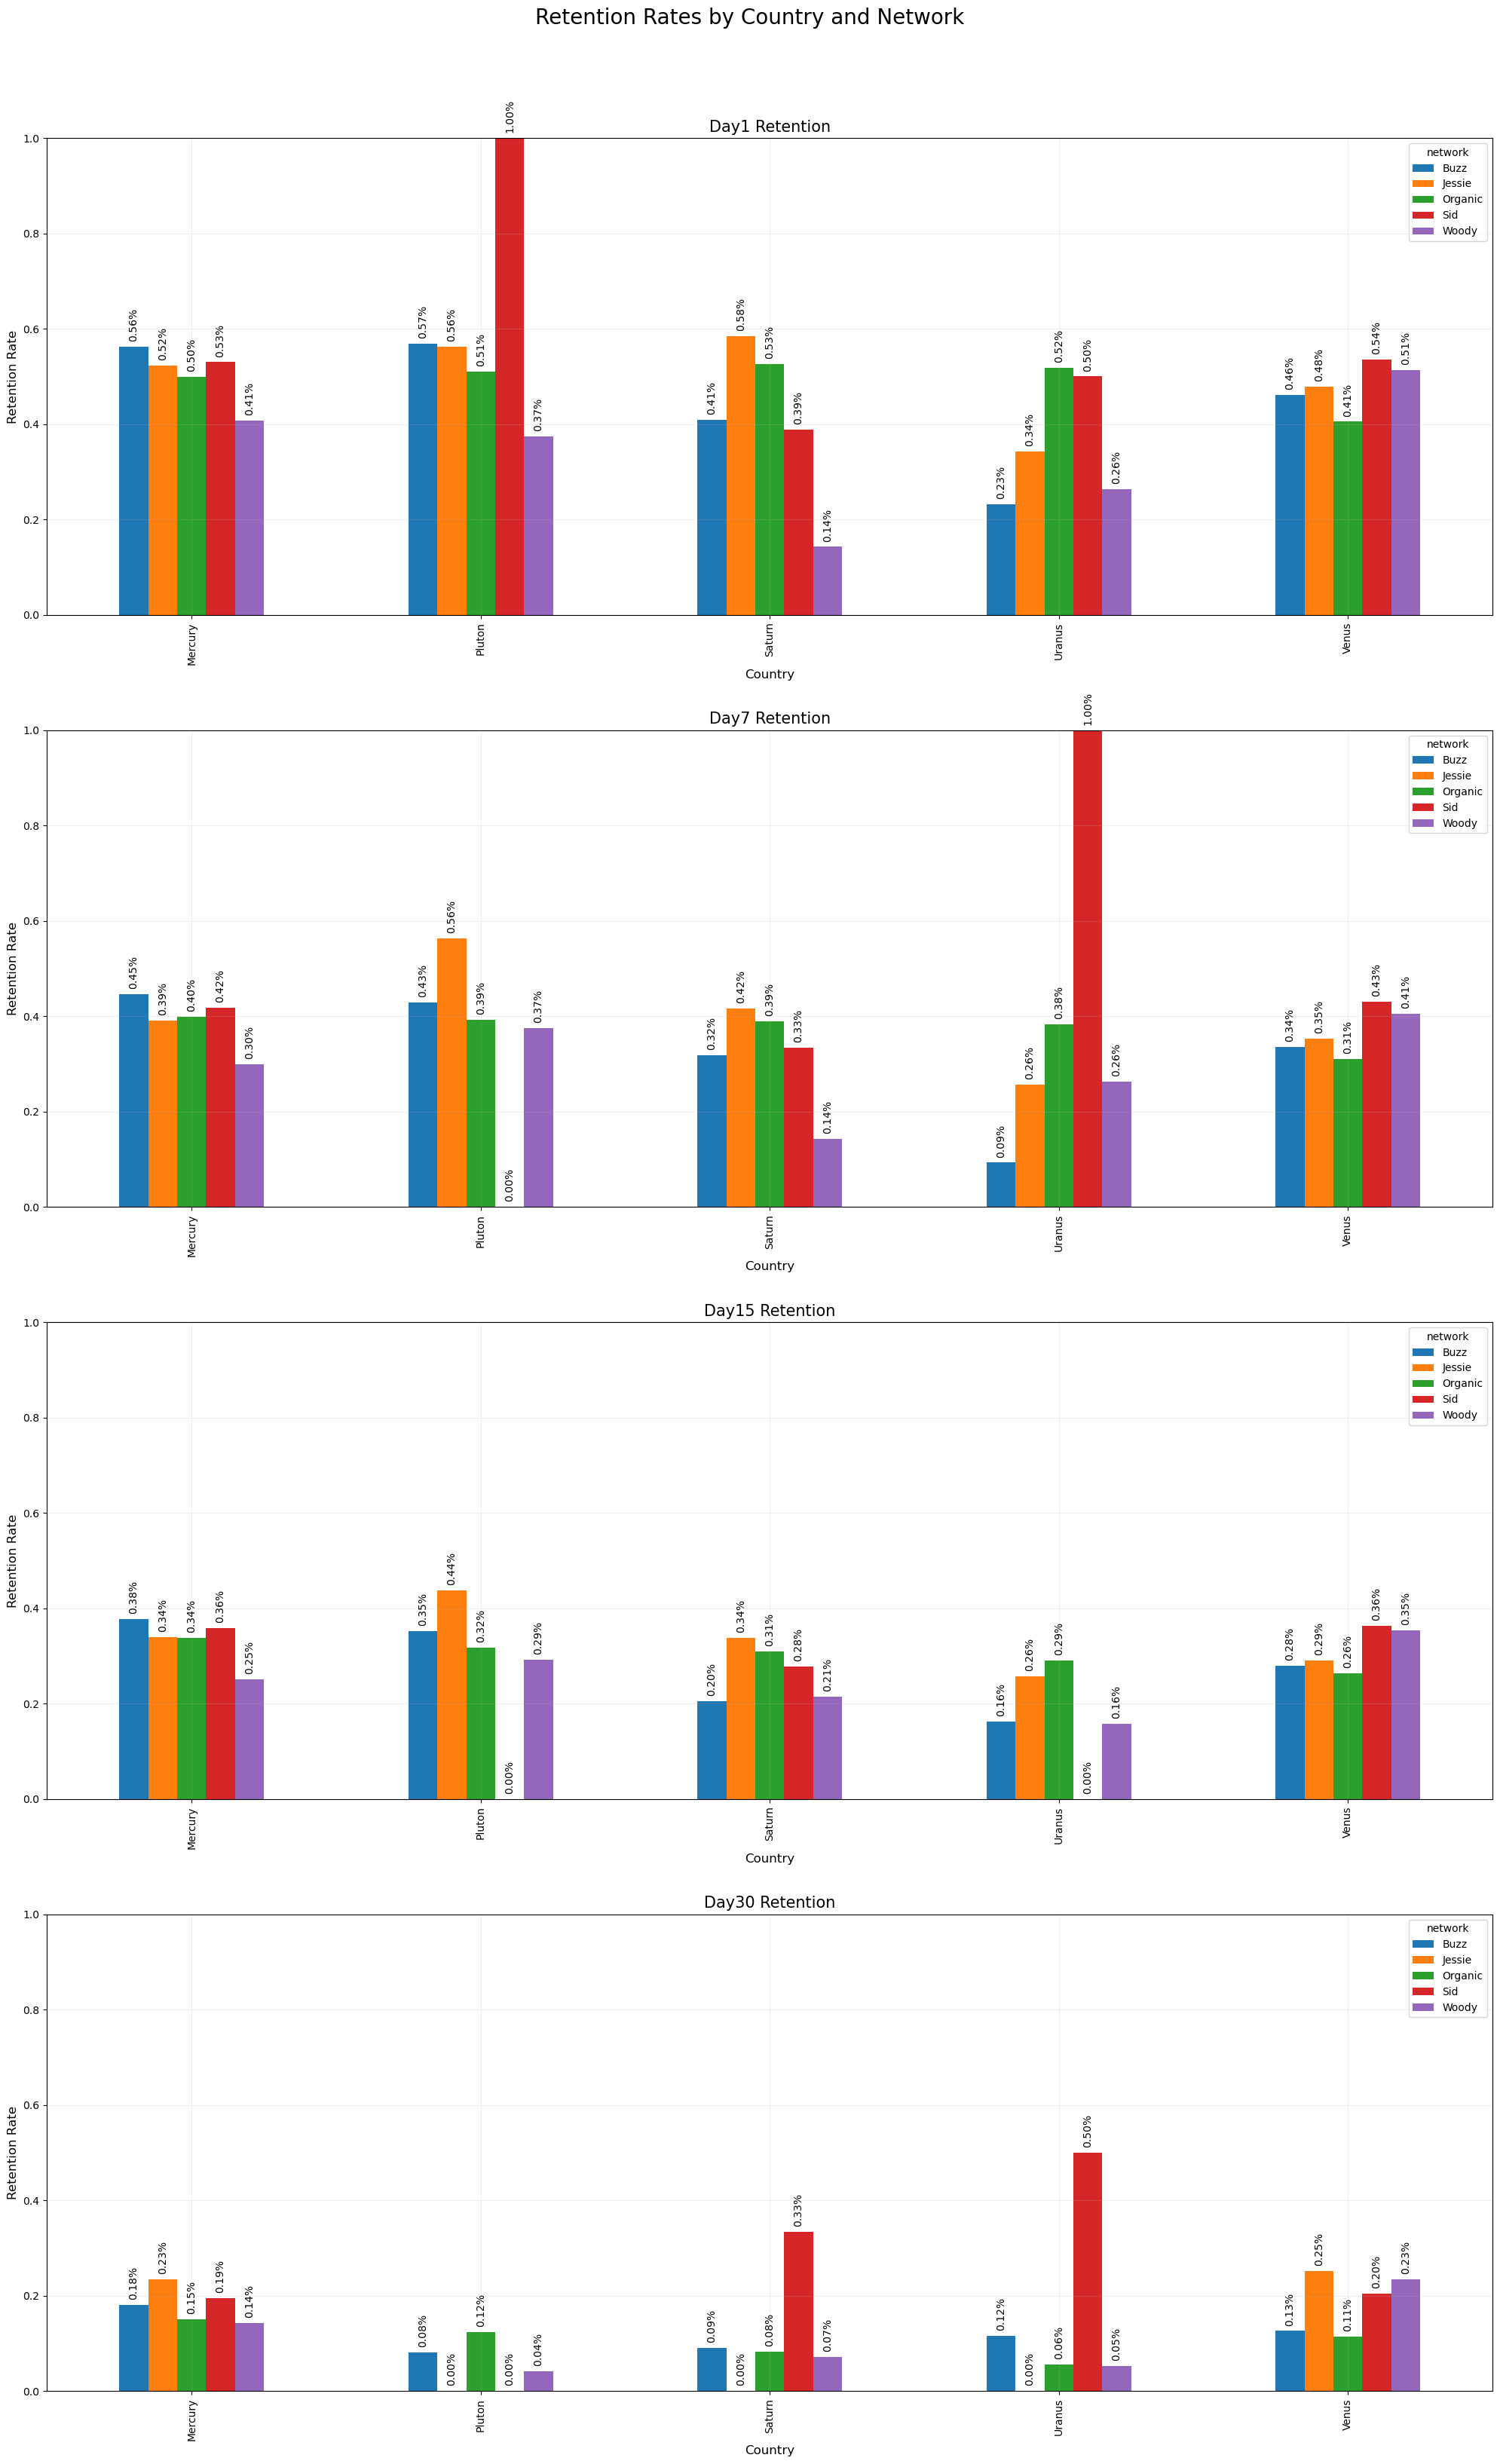

In [52]:
fig, ax = plt.subplots(4, 1, figsize=(20, 4*8))
fig.suptitle('Retention Rates by Country and Network', y=1.02, fontsize=20)

for i, day in enumerate(['Day1', 'Day7', 'Day15', 'Day30']):
    pivot_data = df_retention.pivot_table(index='country', columns='network', values=f'{day}_Retention', aggfunc='mean')
    bar_plot = pivot_data.plot(kind='bar', ax=ax[i])
    ax[i].set_title(f'{day} Retention', fontsize=15)
    ax[i].set_ylabel('Retention Rate', fontsize=12)
    ax[i].set_xlabel('Country', fontsize=12)
    ax[i].grid(alpha=0.2)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_ylim(0, 1)

    for p in bar_plot.patches:
        ax[i].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)

plt.tight_layout()

The Sid network demonstrates significantly higher rates of satisfaction and engagement within the first 30 days. While a gradual decline in retention over time is expected, it is concerning that retention rates for Pluto, Saturn, and Uranus drop to near zero. To address this, we should explore targeted engagement opportunities for these regions to improve their long-term retention.

In [21]:
query_max_levels_reached = """
SELECT 
    i.user_id,
    MAX(le.level) AS max_level,
    i.country,
    i.platform,
    i.network
FROM 
    `casedreamgames.Analytics.dataset_install` i
JOIN
    `casedreamgames.Analytics.dataset_level_end` le ON i.user_id = le.user_id
GROUP BY 
    i.user_id, i.country, i.platform, i.network;
"""

df_max_levels_reached = connection.query(query_max_levels_reached).to_dataframe()

In [22]:
fig_platform = go.Figure()
pivot_platform = df_max_levels_reached.pivot_table(index='max_level', columns='platform', values='user_id', aggfunc='count').fillna(0)
for column in pivot_platform.columns:
    fig_platform.add_trace(go.Scatter(x=pivot_platform.index, y=pivot_platform[column], mode='lines', name=column))
fig_platform.update_layout(height=600, width=1000, title_text="Max Levels Reached by Platform")
fig_platform.update_xaxes(title_text="Max Level")
fig_platform.update_yaxes(title_text="User Count")
fig_platform.show()

fig_network = go.Figure()
pivot_network = df_max_levels_reached.pivot_table(index='max_level', columns='network', values='user_id', aggfunc='count').fillna(0)
for column in pivot_network.columns:
    fig_network.add_trace(go.Scatter(x=pivot_network.index, y=pivot_network[column], mode='lines', name=column))
fig_network.update_layout(height=600, width=1000, title_text="Max Levels Reached by Network")
fig_network.update_xaxes(title_text="Max Level")
fig_network.update_yaxes(title_text="User Count")
fig_network.show()

fig_country = go.Figure()
pivot_country = df_max_levels_reached.pivot_table(index='max_level', columns='country', values='user_id', aggfunc='count').fillna(0)
for column in pivot_country.columns:
    fig_country.add_trace(go.Scatter(x=pivot_country.index, y=pivot_country[column], mode='lines', name=column))
fig_country.update_layout(height=600, width=1000, title_text="Max Levels Reached by Country")
fig_country.update_xaxes(title_text="Max Level")
fig_country.update_yaxes(title_text="User Count")
fig_country.show()


We can observe a frequence-like pattern which indicates a treshold of hardness in every 10 level or so.

In [23]:
query_average_ses_length = """
SELECT 
    i.user_id,
    AVG(s.time_spent) AS average_session_time,
    i.platform,
    i.country,
    i.network
FROM 
    `casedreamgames.Analytics.dataset_install` i
JOIN
    `casedreamgames.Analytics.dataset_session` s on i.user_id = s.user_id
GROUP BY 
    user_id, i.platform, i.country, i.network;
"""

df_avg_ses_length = connection.query(query_average_ses_length).to_dataframe()

In [62]:
# Calculate averages grouped by country, network, and platform
df_avg_ses_length_grouped = df_avg_ses_length.groupby(['country', 'network', 'platform']).mean().reset_index()

# Create the sunburst plot
fig = px.sunburst(df_avg_ses_length_grouped, path=['country', 'network', 'platform'], values='average_session_time', color='average_session_time', color_continuous_scale='viridis')

fig.update_layout(
    title='Average Session Length by Platform, Country, and Network',
    margin=dict(t=50, l=10, r=10, b=10),
    width=800,
    height=800
)

fig.show()

/var/folders/zy/8vkqw9_92mz0f0j_m5360t9c0000gn/T/ipykernel_90651/1030847967.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



The heatmap shows that Android users in Saturn have shorter average session times, indicating a lower attention span. We should consider a specialized approach for this group, using A/B testing and setting the KPI as average session time.

In [63]:
query_average_time_from_install_to_level_end = """
SELECT 
    i.user_id,
    MIN(i.event_time) AS first_install_time,
    MAX(le.event_time) AS last_level_end_time,
    TIMESTAMP_DIFF(MIN(i.event_time), MAX(le.event_time), HOUR) AS time_diff_hours,
    i.platform,
    i.country,
    i.network
FROM 
    `casedreamgames.Analytics.dataset_install` i
JOIN 
    `casedreamgames.Analytics.dataset_level_end` le ON i.user_id = le.user_id
GROUP BY 
    i.user_id, i.platform, i.country, i.network;
"""

df_time_to_level_end = connection.query(query_average_time_from_install_to_level_end).to_dataframe()

In [64]:
df_time_to_level_end['time_diff_hours'] = df_time_to_level_end['time_diff_hours'].abs()
fig = px.sunburst(df_time_to_level_end, path=['country', 'network', 'platform'], values='time_diff_hours', title='Average Time from Install to Last Level End by Platform, Network, and Country')

fig.update_layout(margin=dict(t=50, l=10, r=10, b=10))
fig.update_layout(width=800, height=800)
fig.show()

Lifecycle of our users are longer at mercury which refers to a loyalty to our product. We should consider rewarding loyalty of pluton and venus with examples like exponentially growing value of daily rewards. 

# <center> CHURN

In [27]:
query_churn_30 = """
WITH MaxDate AS (
    SELECT MAX(event_time) AS max_date
    FROM `casedreamgames.Analytics.dataset_session`
),

LastSession AS (
    SELECT 
        s.user_id,
        s.platform,
        i.country,
        MAX(s.event_time) AS last_session_time
    FROM 
        `casedreamgames.Analytics.dataset_session` s
    JOIN 
        `casedreamgames.Analytics.dataset_install` i ON s.user_id = i.user_id
    GROUP BY 
        s.user_id, s.platform, i.country
),

ChurnedOver30 AS (
    SELECT 
        user_id,
        platform,
        country
    FROM 
        LastSession, MaxDate
    WHERE 
        last_session_time < max_date - INTERVAL 30 DAY 
),

TotalUsers AS (
    SELECT 
        platform,
        country,
        COUNT(DISTINCT user_id) AS total_users
    FROM 
        `casedreamgames.Analytics.dataset_install`
    GROUP BY 
        platform, country
),

TotalChurned30 AS (
    SELECT 
        platform,
        country,
        COUNT(DISTINCT user_id) AS churned_users
    FROM 
        ChurnedOver30
    GROUP BY 
        platform, country
),

ChurnRates AS (
    SELECT 
        a.platform,
        a.country,
        '30-day' AS churn_period,
        (a.churned_users * 100.0) / b.total_users AS churn_rate_percentage
    FROM 
        TotalChurned30 a
    JOIN 
        TotalUsers b USING (platform, country)
)

SELECT *
FROM 
    ChurnRates;
"""

df_churn_30 = connection.query(query_churn_30).to_dataframe()

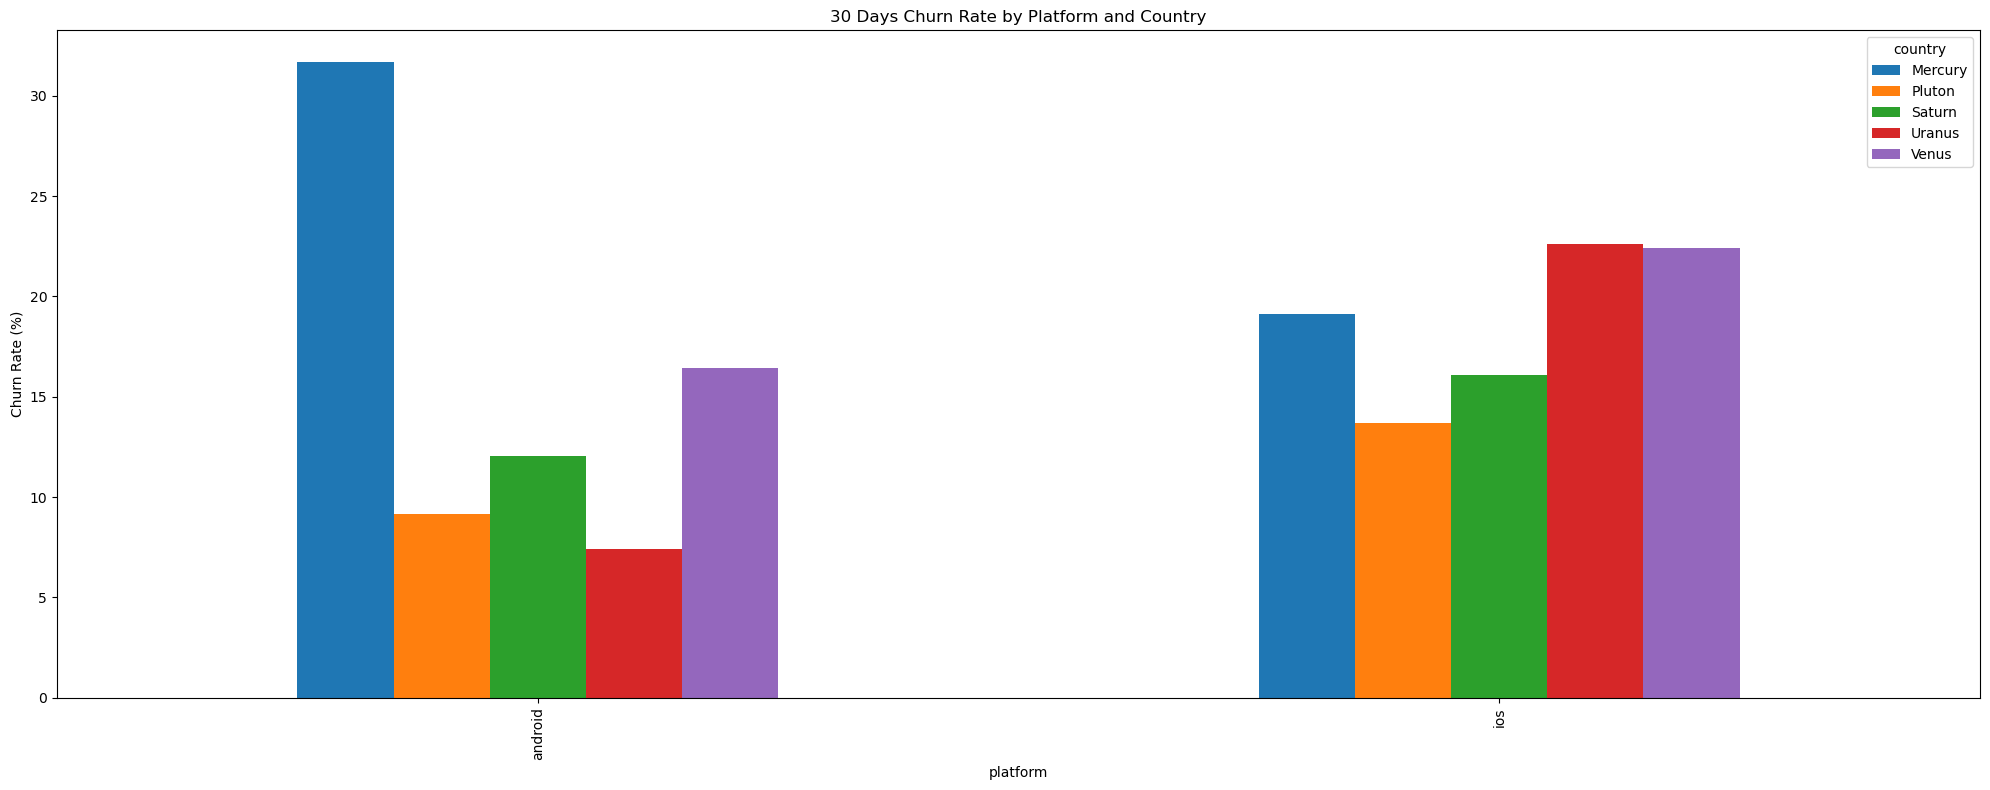

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

df_churn_30.pivot_table(index='platform', columns='country', values='churn_rate_percentage').plot(kind='bar', ax=ax)
ax.set_title('30 Days Churn Rate by Platform and Country')
ax.set_ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()


As users near the end of their journey, Android players from Mercury show high churn rates, while other countries have higher churn on iOS. We should consider making localized offers, such as free booster packs on iOS, when users approach the analyzed period length to reduce churn during this critical time.

## <center>  OVERALL COMMENTS </center>

When looking at the big picture, we observe a consistent number of installs and daily activity, with a churn rate that is relatively small compared to the industry average. These factors are promising for attracting investor interest. As mentioned previously, many localized or targeted actions can be taken to enhance our performance. Overall, my analysis indicates a very stable state, but by breaking down our metrics into smaller parts, we can identify and brainstorm extremely valuable actions.

##  <center> Level Dashboard Design

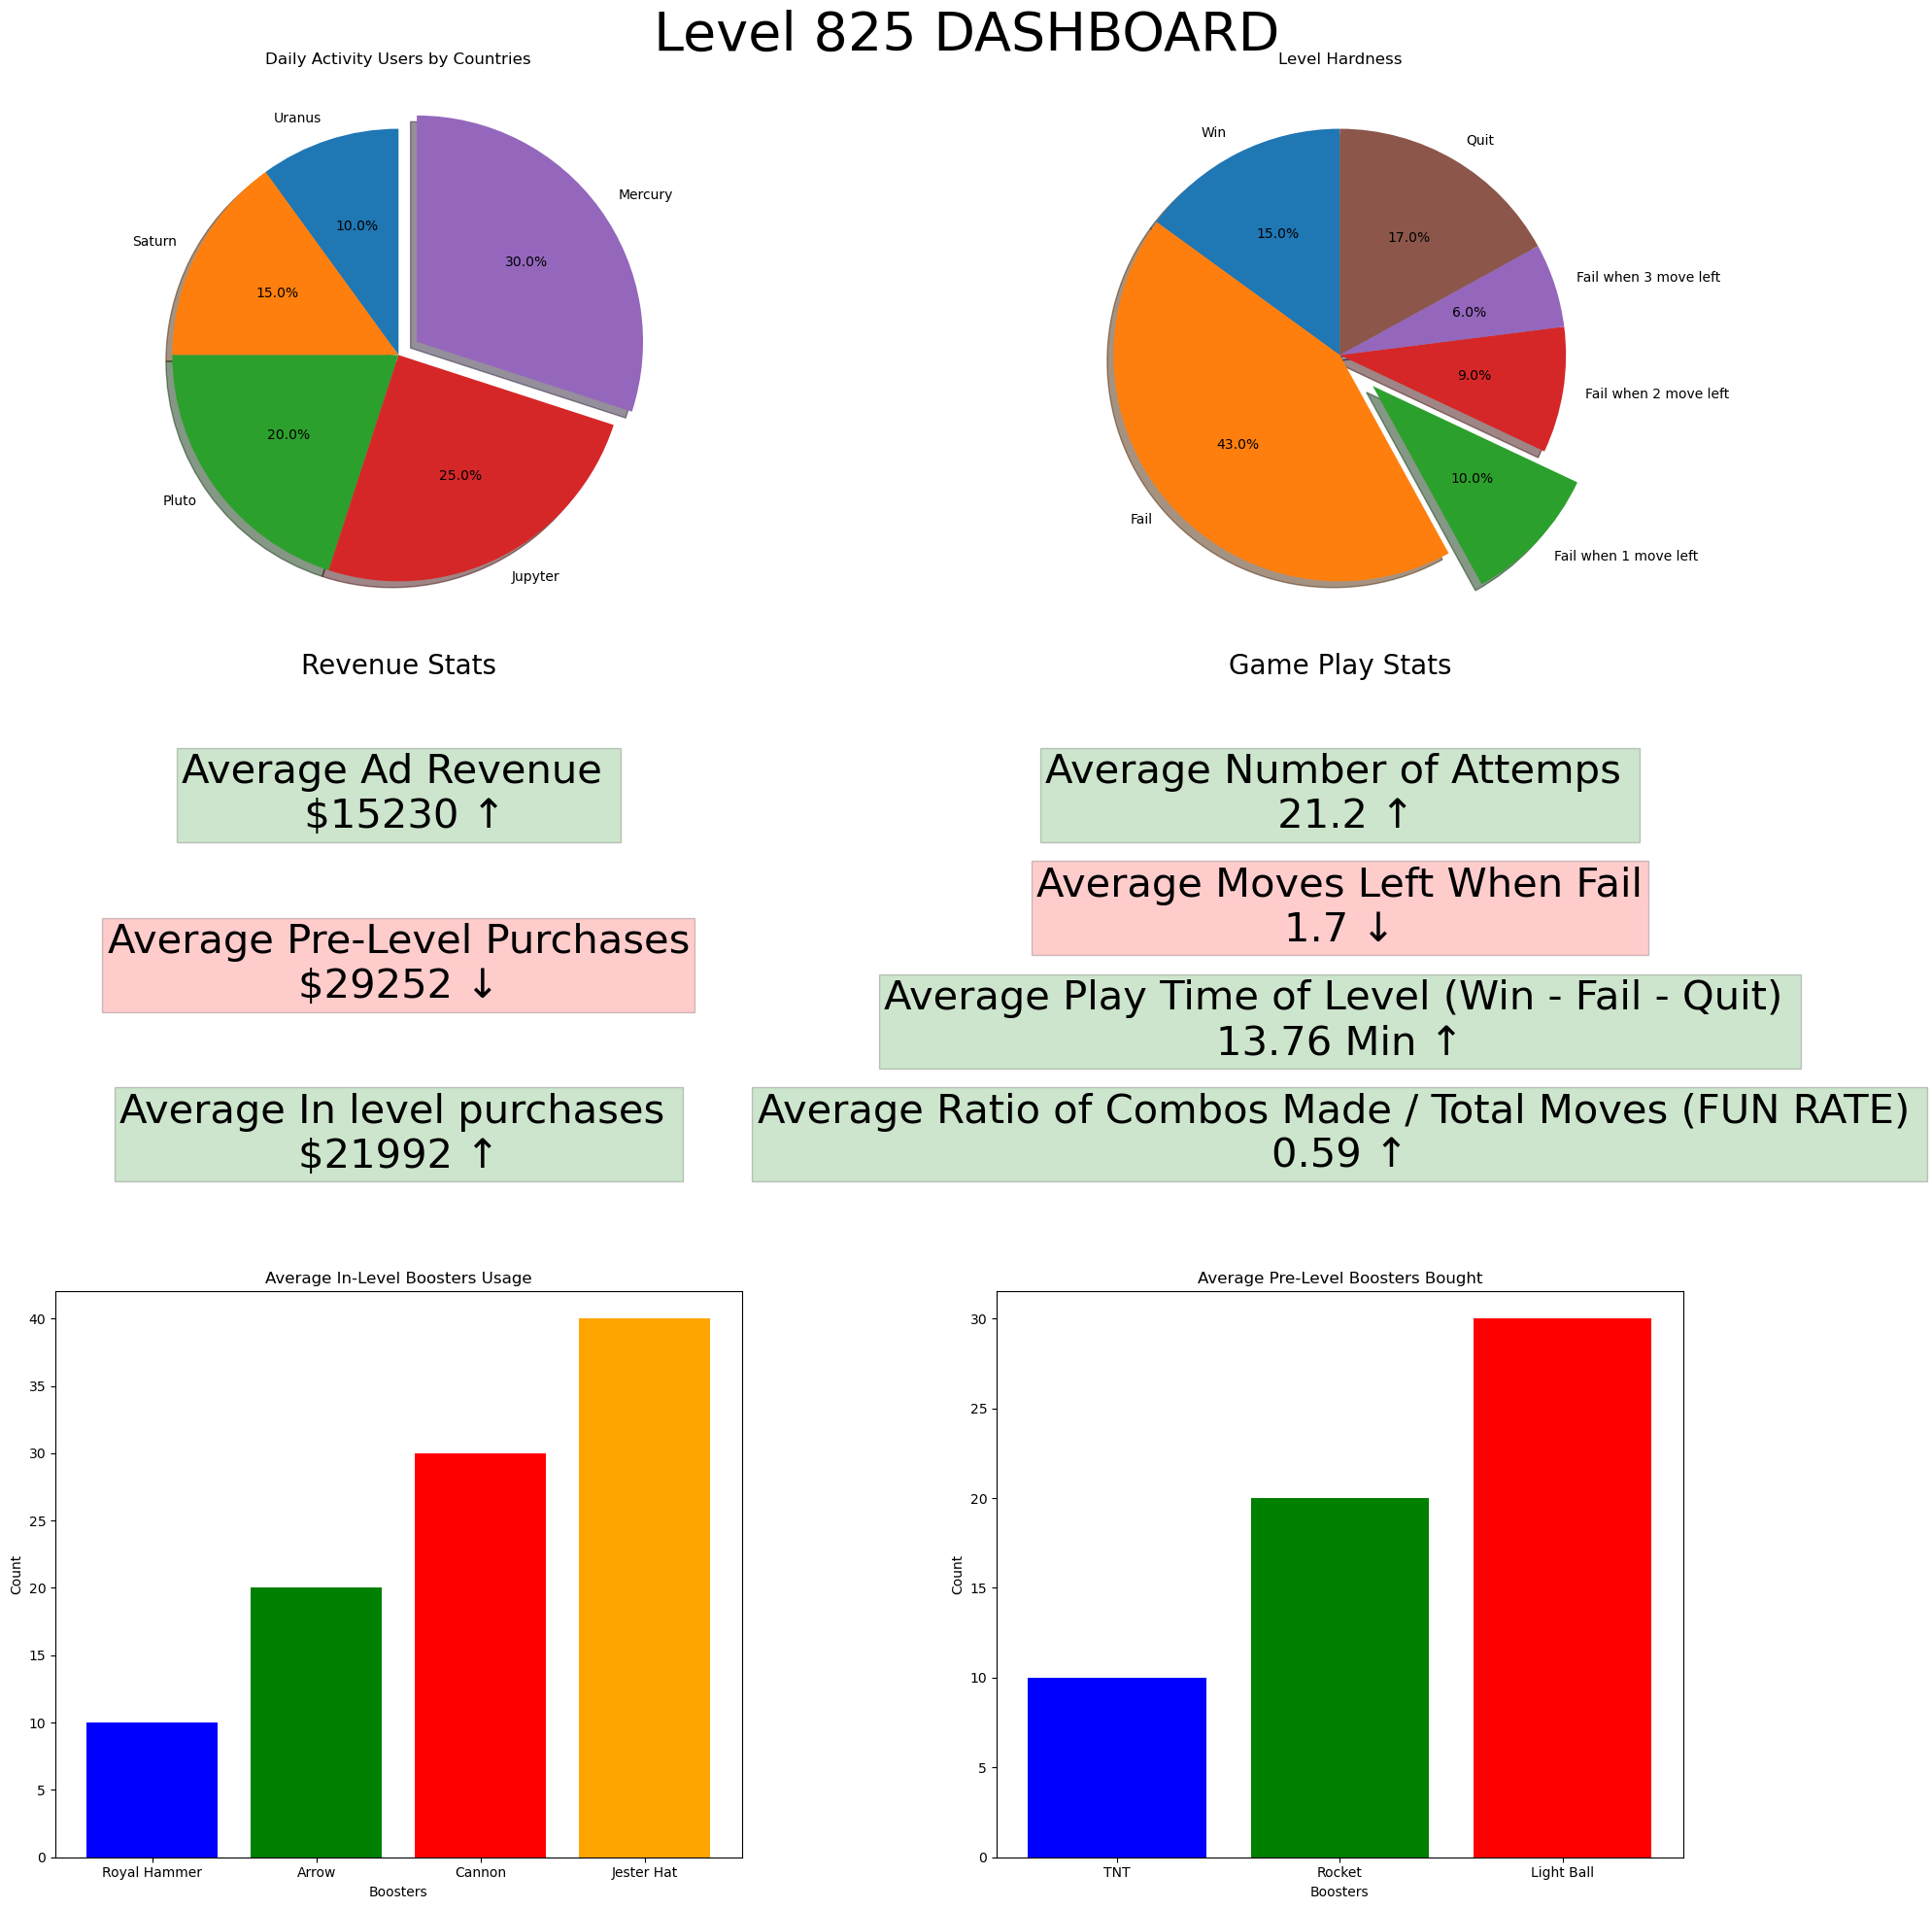

In [65]:
import matplotlib.pyplot as plt

# Create a figure with a grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

plt.suptitle('Level 825 DASHBOARD', fontsize=40)

# Bar plot
boosters = ['TNT', 'Rocket', 'Light Ball']
avg_boosters_counts = [10, 20, 30]
axs[2, 1].bar(boosters, avg_boosters_counts, color=['blue', 'green', 'red'])
axs[2, 1].set_xlabel('Boosters')
axs[2, 1].set_ylabel('Count')
axs[2, 1].set_title('Average Pre-Level Boosters Bought')

# Pie chart
labels = ['Win', 'Fail', 'Fail when 1 move left', 'Fail when 2 move left', 'Fail when 3 move left', 'Quit']
sizes = [15, 43, 10, 9, 6, 17]
explode = (0, 0, 0.2, 0, 0, 0)
axs[0, 1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axs[0, 1].title.set_text('Level Hardness')

# Text boxes for Revenue Stats
axs[1, 0].axis('off')  # Hide the axis
axs[1, 0].set_title('Revenue Stats', fontsize=20)
axs[1, 0].text(0.5, 0.8, 'Average Ad Revenue \n $15230 ↑',
               horizontalalignment='center', verticalalignment='center',
               fontsize=30, bbox=dict(facecolor='Green', alpha=0.2))
axs[1, 0].text(0.5, 0.5, 'Average Pre-Level Purchases\n$29252 ↓',
               horizontalalignment='center', verticalalignment='center',
               fontsize=30, bbox=dict(facecolor='red', alpha=0.2))
axs[1, 0].text(0.5, 0.2, 'Average In level purchases \n$21992 ↑',
               horizontalalignment='center', verticalalignment='center',
               fontsize=30, bbox=dict(facecolor='green', alpha=0.2))

# Text boxes for Game Play Stats
axs[1, 1].axis('off')  # Hide the axis
axs[1, 1].set_title('Game Play Stats', fontsize=20)
axs[1, 1].text(0.5, 0.8, 'Average Number of Attemps \n 21.2 ↑',
               horizontalalignment='center', verticalalignment='center',
               fontsize=30, bbox=dict(facecolor='Green', alpha=0.2))
axs[1, 1].text(0.5, 0.6, 'Average Moves Left When Fail\n1.7 ↓',
               horizontalalignment='center', verticalalignment='center',
               fontsize=30, bbox=dict(facecolor='red', alpha=0.2))
axs[1, 1].text(0.5, 0.4, 'Average Play Time of Level (Win - Fail - Quit) \n13.76 Min ↑',
               horizontalalignment='center', verticalalignment='center',
               fontsize=30, bbox=dict(facecolor='green', alpha=0.2))
axs[1, 1].text(0.5, 0.2, 'Average Ratio of Combos Made / Total Moves (FUN RATE) \n0.59 ↑',
               horizontalalignment='center', verticalalignment='center',
               fontsize=30, bbox=dict(facecolor='green', alpha=0.2))


# Bar plot
boosters = ['Royal Hammer', 'Arrow', 'Cannon', 'Jester Hat']
avg_boosters_counts = [10, 20, 30, 40]
axs[2, 0].bar(boosters, avg_boosters_counts, color=['blue', 'green', 'red', 'orange'])
axs[2, 0].set_xlabel('Boosters')
axs[2, 0].set_ylabel('Count')
axs[2, 0].set_title('Average In-Level Boosters Usage')

# Pie chart
labels = ['Uranus', 'Saturn', 'Pluto', 'Jupyter', 'Mercury']
sizes = [20, 30, 40, 50, 60]
explode = (0, 0, 0, 0, 0.1)
axs[0, 0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axs[0, 0].title.set_text('Daily Activity Users by Countries')

plt.tight_layout()
plt.show()


Thanks again for the opportunity. Looking forward to meet with you in face-to-face settings!

Sincerely,

İlker